
# Games Store performance Analysis

## Goal

- How customers accumulate loyalty points
- How useful are remuneration and spending scores dat
- Can social data (e.g. customer reviews) be used in marketing campaigns

## Setup

### Importing the necessary libraries

In [99]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from statsmodels.formula.api import ols

from sklearn import linear_model
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression


import warnings  
warnings.filterwarnings('ignore')

### Reading the data

In [ ]:
# Load the CSV file(s) as reviews.
reviews = pd.read_csv('turtle_reviews.csv') 

## Data Exploration

In [100]:
# Print the DataFrame.
reviews.head() 

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary
0,Male,18,12.30,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap


In [101]:
# View the DataFrame.
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB


In [102]:
# Any missing values?

reviews.isnull().sum()

gender                    0
age                       0
remuneration (k£)         0
spending_score (1-100)    0
loyalty_points            0
education                 0
language                  0
platform                  0
product                   0
review                    0
summary                   0
dtype: int64

In [103]:
# Explore the data.

# Display summary statistics
reviews.describe()

,age,remuneration (k£),spending_score (1-100),loyalty_points,product
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,39.495000,48.079060,50.000000,1578.032000,4320.521500
std,13.573212,23.123984,26.094702,1283.239705,3148.938839
min,17.000000,12.300000,1.000000,25.000000,107.000000
25%,29.000000,30.340000,32.000000,772.000000,1589.250000
50%,38.000000,47.150000,50.000000,1276.000000,3624.000000
75%,49.000000,63.960000,73.000000,1751.250000,6654.000000
max,72.000000,112.340000,99.000000,6847.000000,11086.000000


In [104]:
# Descriptive statistics.
reviews.describe(include='all')

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary
count,2000,2000.000000,2000.000000,2000.000000,2000.000000,2000,2000,2000,2000.000000,2000,2000
unique,2,NaN,NaN,NaN,NaN,5,1,1,NaN,1980,1432
top,Female,NaN,NaN,NaN,NaN,graduate,EN,Web,NaN,love it,Five Stars
freq,1120,NaN,NaN,NaN,NaN,900,2000,2000,NaN,5,378
mean,NaN,39.495000,48.079060,50.000000,1578.032000,NaN,NaN,NaN,4320.521500,NaN,NaN
std,NaN,13.573212,23.123984,26.094702,1283.239705,NaN,NaN,NaN,3148.938839,NaN,NaN
min,NaN,17.000000,12.300000,1.000000,25.000000,NaN,NaN,NaN,107.000000,NaN,NaN
25%,NaN,29.000000,30.340000,32.000000,772.000000,NaN,NaN,NaN,1589.250000,NaN,NaN
50%,NaN,38.000000,47.150000,50.000000,1276.000000,NaN,NaN,NaN,3624.000000,NaN,NaN
75%,NaN,49.000000,63.960000,73.000000,1751.250000,NaN,NaN,NaN,6654.000000,NaN,NaN


> The DataFrame consists of 2000 rows and eleven columns (gender,age,remuneration,spending_score,loyalty_points,education,language,platform,product,review ans summary). 
The metadata indicates that all columns have 0 null values, which means there is no missing data. The descriptive statistics also confirm the max, min, and count values.

## Data Cleaning

### Drop columns

In [105]:
# Drop unnecessary columns.

# Columns to be removed
columns_to_remove = ['language', 'platform']
# Remove the specified columns
reviews = reviews.drop(columns=columns_to_remove)

# View column names.
reviews.columns

Index(['gender', 'age', 'remuneration (k£)', 'spending_score (1-100)',
       'loyalty_points', 'education', 'product', 'review', 'summary'],
      dtype='object')

### Rename columns

In [106]:
# Rename the column headers.
reviews = reviews.rename(columns={'remuneration (k£)':'remuneration', 'spending_score (1-100)': 'spending_score'})

# View column names.
reviews.columns

Index(['gender', 'age', 'remuneration', 'spending_score', 'loyalty_points',
       'education', 'product', 'review', 'summary'],
      dtype='object')

### Save the DataFrame as a CSV file

In [107]:
# Create a CSV file as output.
output_file_path = 'reviews.csv'
reviews.to_csv(output_file_path, index=False)

print(f"CSV file '{output_file_path}' created successfully.")

CSV file 'reviews.csv' created successfully.


In [108]:
# Import new CSV file with Pandas.
reviews = pd.read_csv('reviews.csv')  

# View DataFrame.
reviews.shape

(2000, 9)

##  Linear regression analysis

### spending vs loyalty

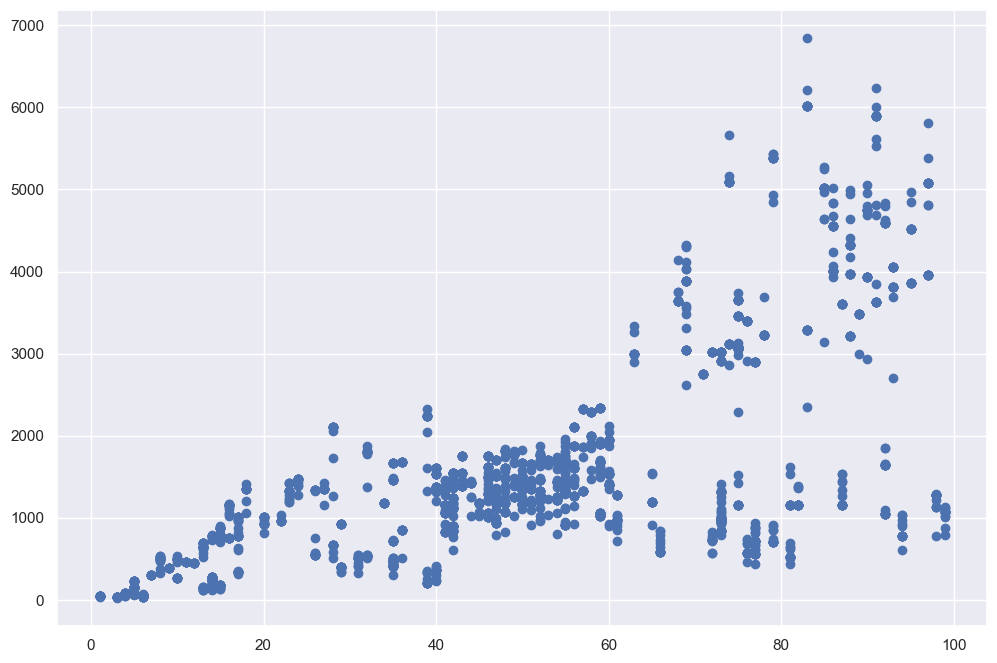

In [109]:
# Independent variable.
X = reviews['spending_score'] 
# Dependent variable.
y = reviews['loyalty_points']

# Check for linearity.
plt.scatter(X,y)

In [110]:
# OLS model and summary.
# Run the OLS test.
f = 'y ~ X'
test = ols(f, data = reviews).fit()

# View the output.
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Fri, 26 Jan 2024   Prob (F-statistic):          2.92e-263
Time:                        12:09:39   Log-Likelihood:                -16550.
No. Observations:                2000   AIC:                         3.310e+04
Df Residuals:                    1998   BIC:                         3.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -75.0527     45.931     -1.634      0.102    -165.129      15.024
X             33.0617      0.814     40.595      0.000      31.464      34.659
==============================================================================
Omnibus:                      126.554   Durbin-Watson:                   1.191
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.528
Skew:                           0.422   Prob(JB):                     2.67e-57
Kurtosis:                       4.554   Cond. No.                         122.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> What does the summary indicates?
> - $R^2$: 45% of the total variability of `y` (loyalty_points), is explained by the variability of `X` (spending_score).  
> - F-stat: If the probability (p-value) of the F-statistic is smaller than a threshold (usually 0.05), the set of variables in the regression model is considered significant. In the summary, the Prob (F-statistic) is given as 2.92e-263, which is extremely small. This indicates strong evidence against the null hypothesis that all coefficients of the independent variables are equal to zero.
> - `X`: The coefficient of `X` (33.0617) represents the expected change in the dependent variable (`y` or loyalty_points) for a one-unit change in the independent variable (`X` or spending_score). Therefore, if the spending_score `X` changes by 1 unit, the expected change in loyalty_points `y` is 33.0617 units.
>  - The `t`-value tests the hypothesis that the slope is significant or not. If the corresponding probability is small (typically smaller than 0.05) the slope is significant. The`t`-value associated with the coefficient of variable x as 40.595. The statement correctly notes that the probability (p-value) of the t-value is zero (0.000), thus the estimated slope is significant.
>   - The last two numbers in the output represent the 95% confidence interval for the true coefficient of the variable `X`, indicating the range within which we are 95% confident the true slope lies. In practical terms, if we were to take different samples from the population, the estimated slope (coefficient of `X`) would vary slightly. For example, if we were to randomly select 100 different samples, each comprising 500 observations of variables `X` and `y`, then we would expect the estimated slope to fall within the interval of (31.464, 34.659) in approximately 95 out of the 100 samples.

In [111]:
# Extract the estimated parameters.
parameters = test.params

# Extract the standard errors.
standard_errors = test.bse

# Extract the predicted values.
predicted_values = test.predict()

# Display the extracted information
print("Estimated Parameters:")
print(parameters)

print("\nStandard Errors:")
print(standard_errors)

print("\nPredicted Values:")
print(predicted_values)

Estimated Parameters:
Intercept   -75.052663
X            33.061693
dtype: float64

Standard Errors:
Intercept    45.930554
X             0.814419
dtype: float64

Predicted Values:
[1214.35337415 2602.94449102  123.31749662 ... 2933.56142361  453.93442921
  189.44088314]


In [112]:
# Set the X coefficient and the constant to generate the regression table.
# x coef: 33.0617.
# Constant coef: -75.0527.
# Create the linear equation.
y_pred = -75.0527 + 33.0617 * X

# View the output.
y_pred

0       1214.3536
1       2602.9450
2        123.3175
3       2470.6982
4       1247.4153
          ...    
1995    2206.2046
1996     189.4409
1997    2933.5620
1998     453.9345
1999     189.4409
Name: spending_score, Length: 2000, dtype: float64

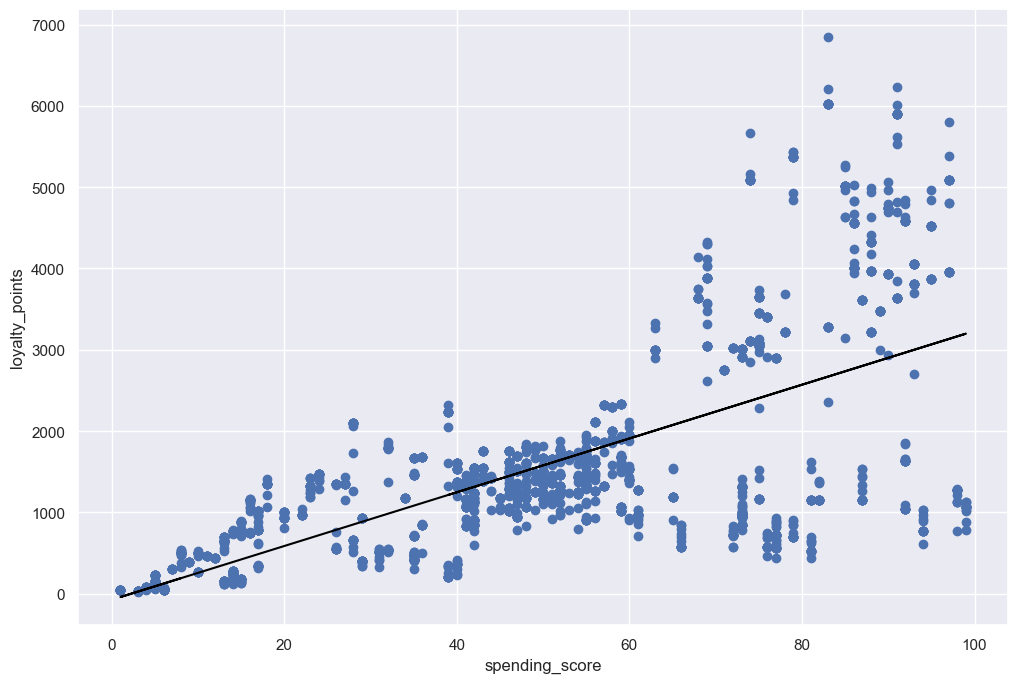

In [113]:
# Plot the graph with a regression line.
# Plot the data points.
plt.scatter(X, y)

# Add labels to the x and y axes
plt.xlabel('spending_score')
plt.ylabel('loyalty_points')

# Plot the line.
plt.plot(X, y_pred, color='black')

# Save the output as 'chart2.png'
plt.savefig('chart2.png')

### renumeration vs loyalty

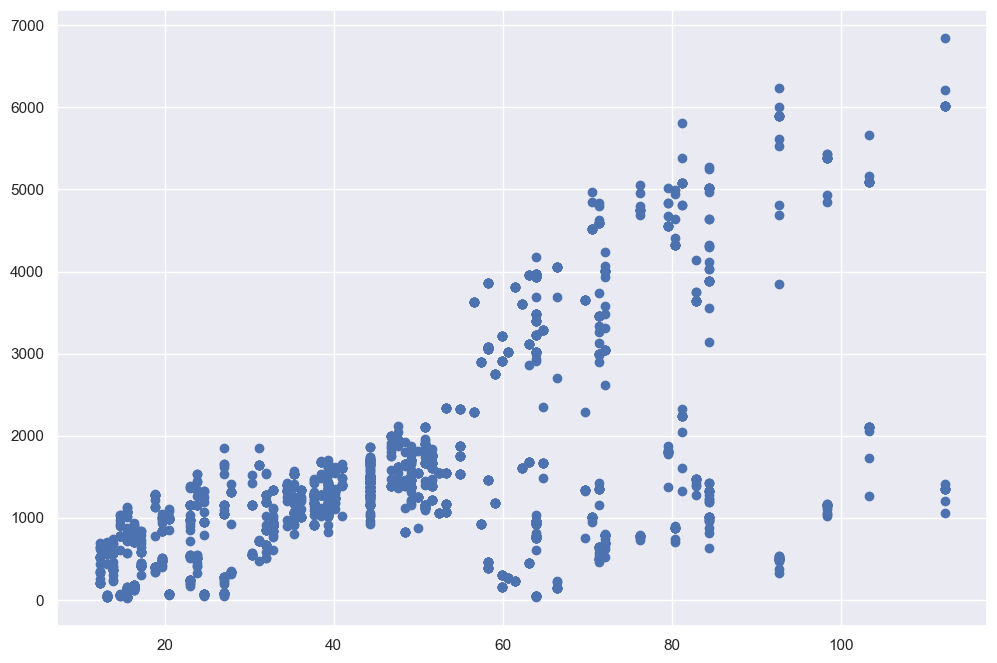

In [114]:
# Independent variable.
X = reviews['remuneration'] 

# Dependent variable.
y = reviews['loyalty_points']



# Check for linearity.
plt.scatter(X,y)

In [115]:
# OLS model and summary.
# Independent variable.
X = reviews['remuneration'] 

# Dependent variable.
y = reviews['loyalty_points']

# Run the OLS test.
f = 'y ~ X'
test = ols(f, data = reviews).fit()

# View the output.
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1222.
Date:                Fri, 26 Jan 2024   Prob (F-statistic):          2.43e-209
Time:                        12:09:58   Log-Likelihood:                -16674.
No. Observations:                2000   AIC:                         3.335e+04
Df Residuals:                    1998   BIC:                         3.336e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -65.6865     52.171     -1.259      0.208    -168.001      36.628
X             34.1878      0.978     34.960      0.000      32.270      36.106
==============================================================================
Omnibus:                       21.285   Durbin-Watson:                   3.622
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.715
Skew:                           0.089   Prob(JB):                     1.30e-07
Kurtosis:                       3.590   Cond. No.                         123.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> What does the summary indicates?
> - $R^2$ (R-squared):The coefficient of determination, $R^2$, is 0.380. This implies that approximately 38% of the total variability in the dependent variable `y` (loyalty_points) is explained by the variability in the independent variable `X` (remuneration). The remaining 62% of the variability is unaccounted for by the model. 
> - F-stat: The F-statistic tests the overall significance of the model. The Prob (F-statistic) is given as 2.43e-209, which is extremely small. This suggests strong evidence against the null hypothesis that all coefficients of the independent variables are equal to zero. Therefore, the set of variables in the regression model is considered significant.
> - `X` (Coefficient): The coefficient of `X` is 34.1878. This represents the expected change in the dependent variable `y` (loyalty_points) for a one-unit change in the independent variable `X` (remuneration). In practical terms, if the remuneration `X` changes by 1 unit, the expected change in loyalty_points `y` is approximately 34.1878 units.
>  - `t`-value: The t-value associated with the coefficient of variable `X` is 34.960. The small p-value (0.000) indicates that the estimated slope is statistically significant. This means that the remuneration `X` has a significant impact on the loyalty_points `y`.
>   - 95% Confidence Interval for Coefficient of X: The interval (32.270, 36.106) represents the range within which we are 95% confident that the true coefficient of the variable `X` lies. In other words, if we were to take different samples from the population, we would expect the estimated slope to fall within this interval in approximately 95% of the samples.

In [116]:
# Extract the estimated parameters.
parameters = test.params

# Extract the standard errors.
standard_errors = test.bse

# Extract the predicted values.
predicted_values = test.predict()

# Display the extracted information
print("Estimated Parameters:")
print(parameters)

print("\nStandard Errors:")
print(standard_errors)

print("\nPredicted Values:")
print(predicted_values)

Estimated Parameters:
Intercept   -65.686513
X            34.187825
dtype: float64

Standard Errors:
Intercept    52.170717
X             0.977925
dtype: float64

Predicted Values:
[ 354.82374068  354.82374068  382.85775758 ... 3102.15739671 3298.39551499
 3102.15739671]


In [117]:
# Set the the X coefficient and the constant to generate the regression table.
# x coef: 34.187825.
# Constant coef: -65.686513.
# Create the linear equation.
y_pred = -65.686513 + 34.187825 * X

# View the output.
y_pred

0        354.823735
1        354.823735
2        382.857751
3        382.857751
4        410.891767
           ...     
1995    2821.817186
1996    3102.157351
1997    3102.157351
1998    3298.395467
1999    3102.157351
Name: remuneration, Length: 2000, dtype: float64

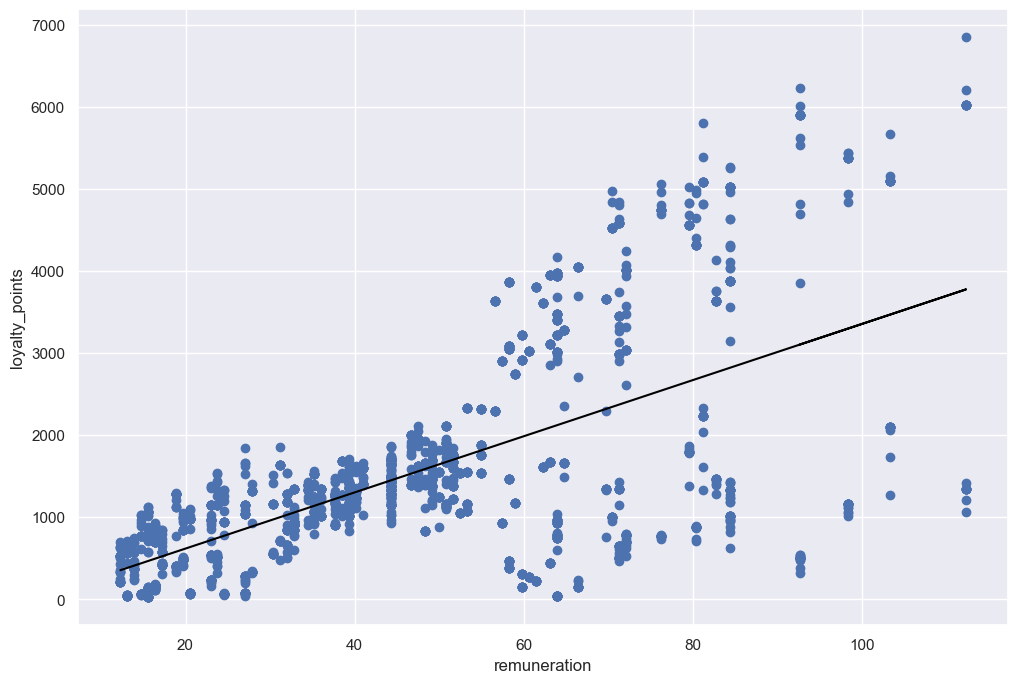

In [118]:
# Plot graph with regression line.
# Plot the data points.
plt.scatter(X, y)

# Add labels to the x and y axes
plt.xlabel('remuneration')
plt.ylabel('loyalty_points')

# Plot the line.
plt.plot(X, y_pred, color='black')

# Save the output as 'chart4.png'
plt.savefig('chart4.png')

### age vs loyalty

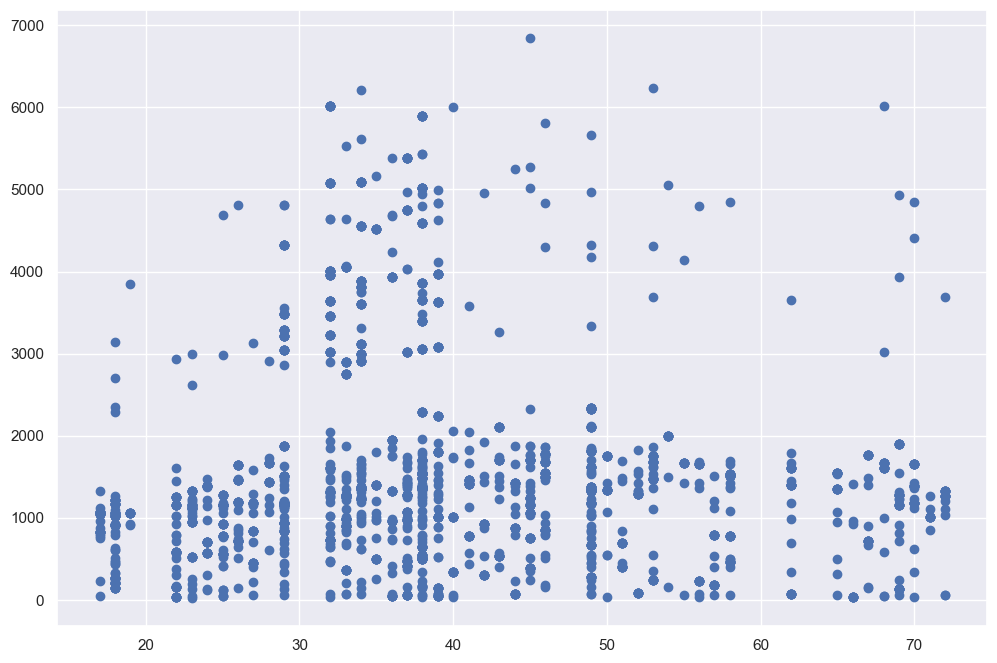

In [119]:
# Independent variable.
X = reviews['age'] 

# Dependent variable.
y = reviews['loyalty_points']


# Check for linearity.
plt.scatter(X,y)

In [120]:
# OLS model and summary.
# Independent variable.
X = reviews['age'] 

# Dependent variable.
y = reviews['loyalty_points']

# Run the OLS test.
f = 'y ~ X'
test = ols(f, data = reviews).fit()

# View the output.
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.606
Date:                Fri, 26 Jan 2024   Prob (F-statistic):             0.0577
Time:                        12:10:06   Log-Likelihood:                -17150.
No. Observations:                2000   AIC:                         3.430e+04
Df Residuals:                    1998   BIC:                         3.431e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1736.5177     88.249     19.678      0.000    1563.449    1909.587
X             -4.0128      2.113     -1.899      0.058      -8.157       0.131
==============================================================================
Omnibus:                      481.477   Durbin-Watson:                   2.277
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              937.734
Skew:                           1.449   Prob(JB):                    2.36e-204
Kurtosis:                       4.688   Cond. No.                         129.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> What does the summary indicates?
> - $R^2$ (R-squared):The coefficient of determination, $R^2$, is 0.002. This implies that only a very small proportion (0.2%) of the total variability in the dependent variable `y` (loyalty_points) is explained by the variability in the independent variable `X` (age). The majority of the variability remains unaccounted for by the model. 
> - F-stat: The F-statistic tests the overall significance of the model. The Prob (F-statistic) is given as 0.0577, which is greater than the common threshold of 0.05. This suggests weak evidence against the null hypothesis that all coefficients of the independent variables are equal to zero. Therefore, the set of variables in the regression model is not considered statistically significant.
> - `X` (Coefficient): The coefficient of `X` is -4.0128. This represents the expected change in the dependent variable `y` (loyalty_points) for a one-unit change in the independent variable `X` (age). In practical terms, if the age `X` changes by 1 unit, the expected change in loyalty_points `y` is approximately -4.0128 units.
>  - `t`-value: The t-value associated with the coefficient of variable `X` is -1.899. The p-value (0.058) is greater than 0.05, indicating that the estimated slope is not statistically significant. This means that the age `X` may not have a significant impact on the loyalty_points `y` in this case.
>   - 95% Confidence Interval for Coefficient of X: The interval [-8.157, 0.131] represents the range within which we are 95% confident that the true coefficient of the variable `X` lies. In practical terms, if we were to take different samples from the population, we would expect the estimated slope to fall within this interval in approximately 95% of the samples.

In [121]:
# Extract the estimated parameters.
parameters = test.params

# Extract the standard errors.
standard_errors = test.bse

# Extract the predicted values.
predicted_values = test.predict()

# Display the extracted information
print("Estimated Parameters:")
print(parameters)

print("\nStandard Errors:")
print(standard_errors)

print("\nPredicted Values:")
print(predicted_values)

Estimated Parameters:
Intercept    1736.517739
X              -4.012805
dtype: float64

Standard Errors:
Intercept    88.248731
X             2.113177
dtype: float64

Predicted Values:
[1664.2872467  1644.22322095 1648.2360261  ... 1600.0823643  1600.0823643
 1608.1079746 ]


In [122]:
# Set the X coefficient and the constant to generate the regression table.


# x coef: -4.012805.
# Constant coef:  1736.517739.
# Create the linear equation.
y_pred = 1736.517739 - 4.012805 * X

# View the output.
y_pred

0       1664.287249
1       1644.223224
2       1648.236029
3       1636.197614
4       1604.095174
           ...     
1995    1588.043954
1996    1563.967124
1997    1600.082369
1998    1600.082369
1999    1608.107979
Name: age, Length: 2000, dtype: float64

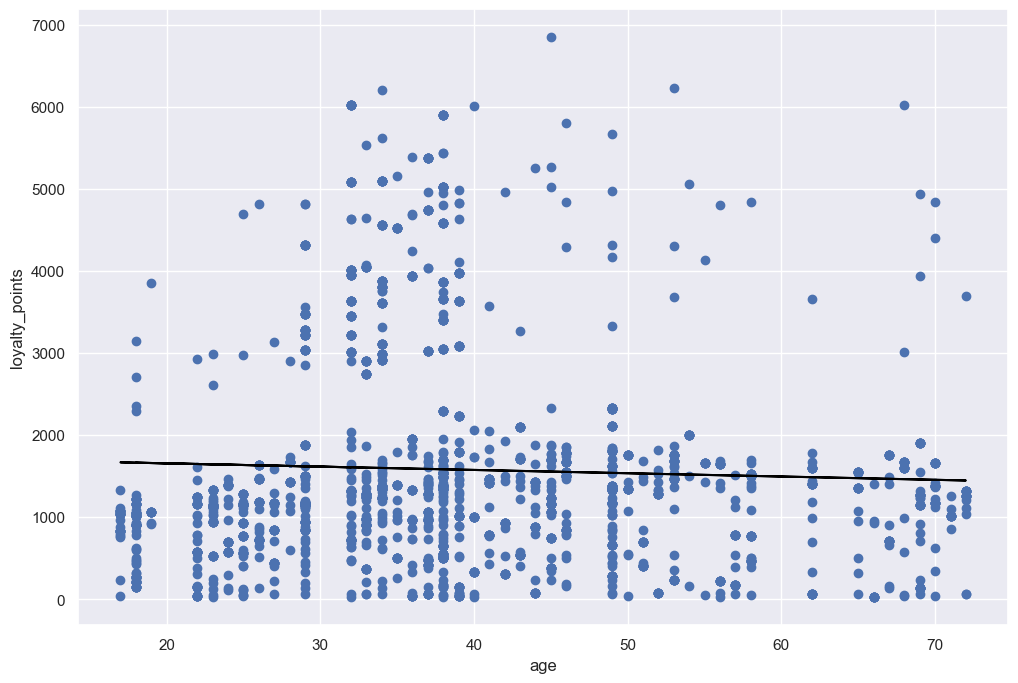

In [123]:
# Plot graph with regression line.
# Plot the data points.
plt.scatter(X, y)

# Add labels to the x and y axes
plt.xlabel('age')
plt.ylabel('loyalty_points')

# Plot the line.
plt.plot(X, y_pred, color='black')

# Save the output as 'chart6.png'
plt.savefig('chart6.png')

## 6. Observations and insights

> - The spending_score exhibits a strong and highly significant positive relationship with loyalty_points, as indicated by a high 𝑅2, an extremely low p-value for the F-statistic, and a significant coefficient. This implies that understanding and influencing spending_score could be pivotal in enhancing loyalty_points. 
> - On the other hand, the remuneration variable also demonstrates a substantial positive relationship with loyalty_points, further highlighting the potential business impact of Total income per customer per year on customer loyalty. 
>  - In contrast, the age variable exhibits a weaker and statistically insignificant relationship with loyalty_points. This prompts consideration for whether age is a crucial factor in loyalty or if other variables should be explored. Future actions may involve focusing marketing strategies on influencing spending behaviours and exploring ways to optimise Total income per customer per year for increased customer loyalty. Further investigation into additional variables contributing to loyalty and refining the model with more relevant features could provide a more comprehensive understanding of customer behaviour and loyalty dynamics.






### Overall Insights:

> - The first and second summaries suggest strong and significant relationships between the independent variable and 'loyalty_points,' supported by high 𝑅 2  , low p-values for F-statistics, and significant coefficients.
> - In contrast, the third summary indicates a weaker relationship with 'age,' as evidenced by a very low 𝑅 2  , a higher p-value for the F-statistic, and a non-significant coefficient.

# 

## Clustering with *k*-means using Python

The marketing department also wants to better understand the usefulness of renumeration and spending scores but do not know where to begin. Task is to identify groups within the customer base that can be used to target specific market segments. Use *k*-means clustering to identify the optimal number of clusters and then apply and plot the data using the created segments.

### Importing the necessary libraries

In [124]:
# Import necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings('ignore')

### Reading the data

In [ ]:
# Load the CSV file(s) as df2.
df2 = pd.read_csv('reviews.csv') 

## Data Exploration

In [125]:
# View DataFrame.
df2.head()

,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


## Data Cleaning

In [126]:
# Drop unnecessary columns.
df2 = df2[['remuneration', 'spending_score']]

# View DataFrame.
df2.head()

,remuneration,spending_score
0,12.30,39
1,12.30,81
2,13.12,6
3,13.12,77
4,13.94,40


In [127]:
# Explore the data.
print(df2.info())
print(df2['remuneration'].value_counts())
print(df2['spending_score'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   remuneration    2000 non-null   float64
 1   spending_score  2000 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 31.4 KB
None
remuneration
44.28    134
63.96     96
39.36     63
49.20     62
71.34     59
        ... 
61.50     14
57.40     14
59.04     14
60.68     14
56.58     14
Name: count, Length: 64, dtype: int64
spending_score
42    76
55    73
73    64
46    57
35    51
      ..
7      7
34     7
9      7
11     7
71     7
Name: count, Length: 84, dtype: int64


In [128]:
# Descriptive statistics.
print(df2.describe())

       remuneration  spending_score
count   2000.000000     2000.000000
mean      48.079060       50.000000
std       23.123984       26.094702
min       12.300000        1.000000
25%       30.340000       32.000000
50%       47.150000       50.000000
75%       63.960000       73.000000
max      112.340000       99.000000


## Plot

Text(0.5, 1.0, 'Scatterplot:Remuneration vs Spending Score')

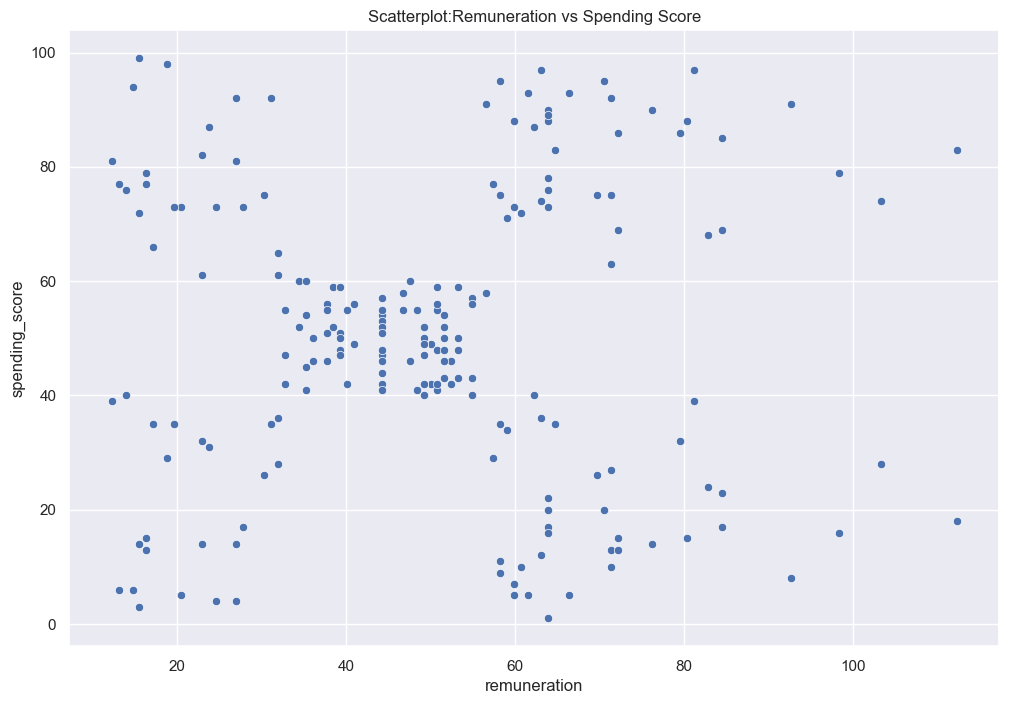

In [129]:
# Create a scatterplot with Seaborn
sns.scatterplot(x='remuneration',
                y='spending_score',
                palette='viridis',
                data=df2)
plt.title('Scatterplot:Remuneration vs Spending Score')

In [131]:
# Standardize the data to have a mean of zero and a standard deviation of one
df2.iloc[:,:4] = StandardScaler().fit_transform(df2.iloc[:,:4])

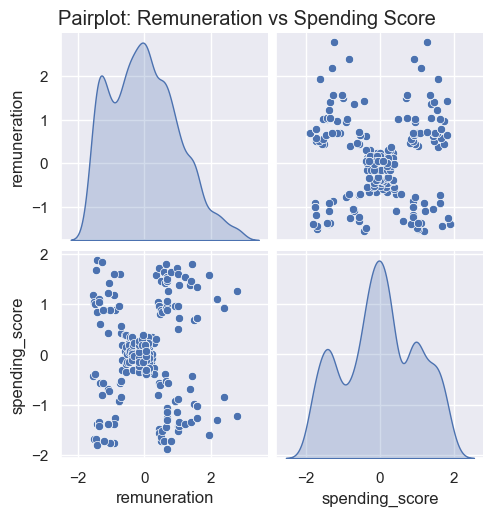

In [132]:
# Create a pairplot with Seaborn.

sns.pairplot(df2, diag_kind= 'kde')
plt.suptitle('Pairplot: Remuneration vs Spending Score', y=1.02)
plt.show()

## Elbow and silhoutte methods

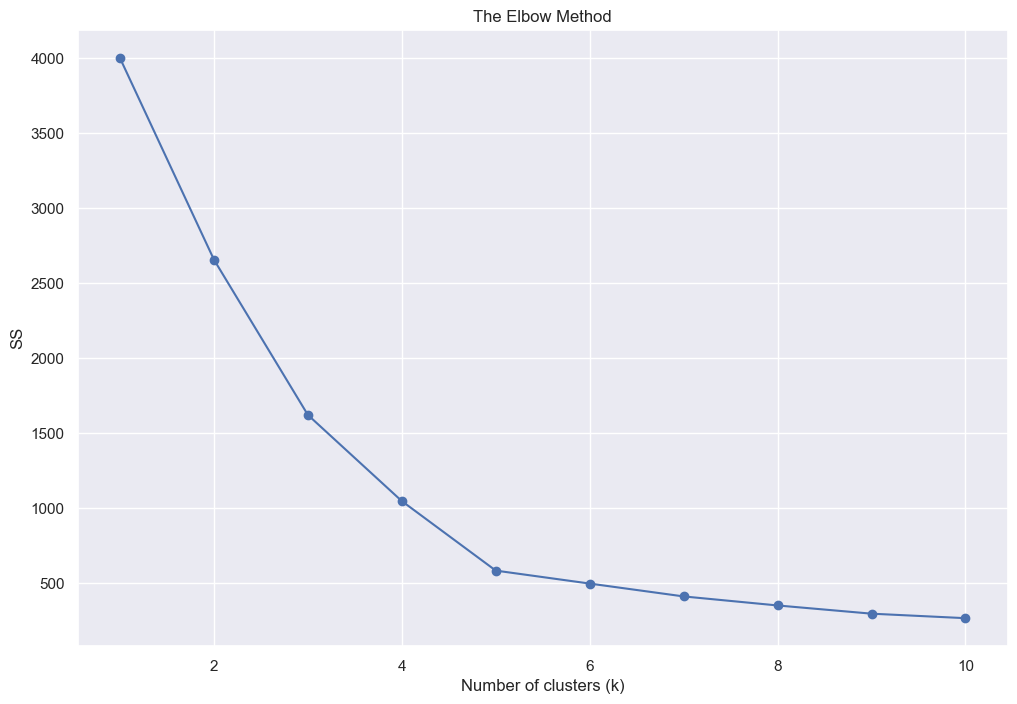

<Figure size 1200x800 with 0 Axes>

In [133]:
# Determine the number of clusters: Elbow method.

ss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i,
                    init = 'k-means++', 
                    max_iter = 500,
                    n_init = 10,
                    random_state = 42)
    kmeans.fit(df2)
    ss.append(kmeans.inertia_)

plt.plot(range(1, 11),
         ss,
         marker='o')

plt.title("The Elbow Method")
plt.xlabel("Number of clusters (k)")
plt.ylabel("SS")
plt.show()
# Save the output as 'chart6.png'
plt.savefig('chart7.png')

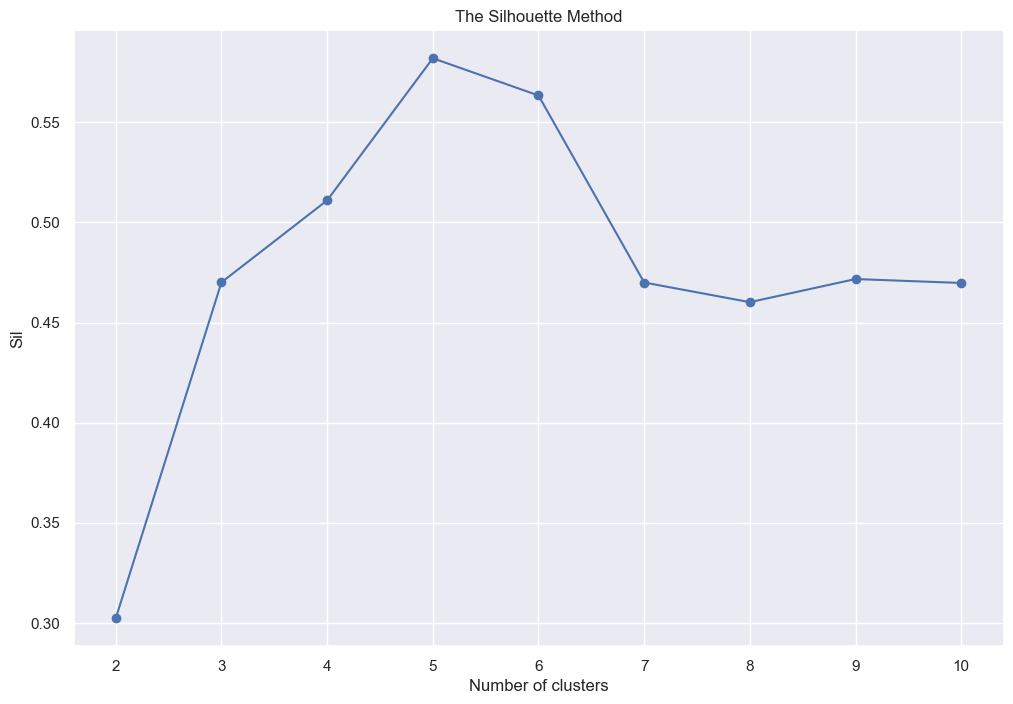

In [134]:
# Determine the number of clusters: Silhouette method.
sil = []
kmax = 10

for k in range(2, kmax+1):
    kmeans_s = KMeans(n_clusters = k).fit(df2)
    labels = kmeans_s.labels_
    sil.append(silhouette_score(df2,
                                labels,
                                metric = 'euclidean'))

# Plot the silhouette method.
plt.plot(range(2, kmax+1),
         sil,
         marker='o')

plt.title("The Silhouette Method")
plt.xlabel("Number of clusters")
plt.ylabel("Sil")
# Save the output as 'chart6.png'
plt.savefig('chart8.png')
plt.show()

### Evaluate k-means model at different values of *k*

> Elbow Method:
The "elbow" point where the within-cluster sum of squares (ss) starts to decrease at a slower rate is 5. 
This is an insight into a potentially optimal number of clusters.

> Silhouette Method:
The Silhouette scores for different values of k. Considring The highest Silhouette score between
4,5 and 6 indicates 5 has a gigher score.

In [135]:
for num_clusters in [4, 5, 6]:
    kmeans = KMeans(n_clusters=num_clusters, random_state=42).fit(df2)
    labels = kmeans.labels_
    silhouette = silhouette_score(df2, labels)
    print(f"Silhouette score for {num_clusters} clusters: {silhouette}")

Silhouette score for 4 clusters: 0.5085022478839506
Silhouette score for 5 clusters: 0.5819551082949933
Silhouette score for 6 clusters: 0.5690783898193295


#### Explaining which value might give the best clustering

> From visual inspection cluster 5 seem to have well separated data. And it has Higher Silhouette scores
which is an indication of a better-defined clusters.

## Fit final model and justify choice

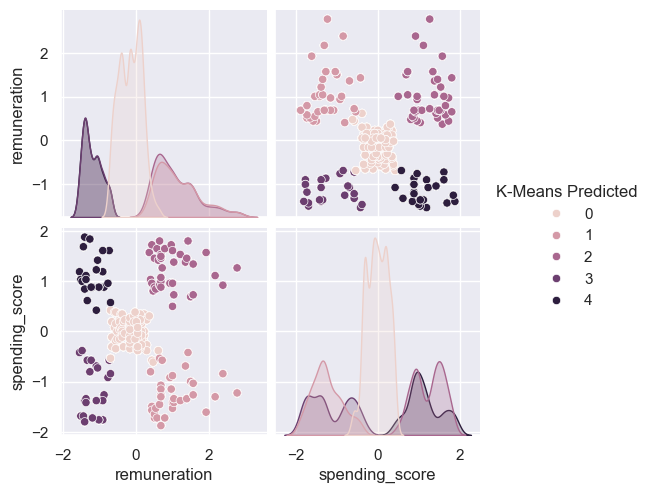

In [136]:
# Apply the final model.
kmeans = KMeans(n_clusters = 5,
                max_iter = 15000,
                init='k-means++',
                random_state=0).fit(df2)

clusters = kmeans.labels_
df2['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(df2,
             hue='K-Means Predicted',
             diag_kind= 'kde')


In [137]:
# Check the number of observations per predicted class.
df2['K-Means Predicted'].value_counts()

K-Means Predicted
0    774
2    356
1    330
3    271
4    269
Name: count, dtype: int64

##  Plot and interpret the clusters

In [138]:
# View the DataFrame.
print(df2.head(10))
print(df2.tail(10))

#Save DataFrame to cvs
df2.to_csv('clustered_reviews.csv', index=False)

   remuneration  spending_score  K-Means Predicted
0     -1.547658       -0.421647                  3
1     -1.547658        1.188278                  4
2     -1.512188       -1.686588                  3
3     -1.512188        1.034952                  4
4     -1.476718       -0.383315                  3
5     -1.476718        0.996620                  4
6     -1.441248       -1.686588                  3
7     -1.441248        1.686588                  4
8     -1.405778       -1.801582                  3
9     -1.405778        0.843294                  4
      remuneration  spending_score  K-Means Predicted
1990     -1.370308        1.034952                  4
1991     -1.370308       -1.418267                  3
1992      1.573692       -1.264941                  1
1993      1.573692        1.341604                  2
1994      1.573692       -1.034952                  1
1995      1.573692        0.728299                  2
1996      1.928391       -1.609925                  1
1997   

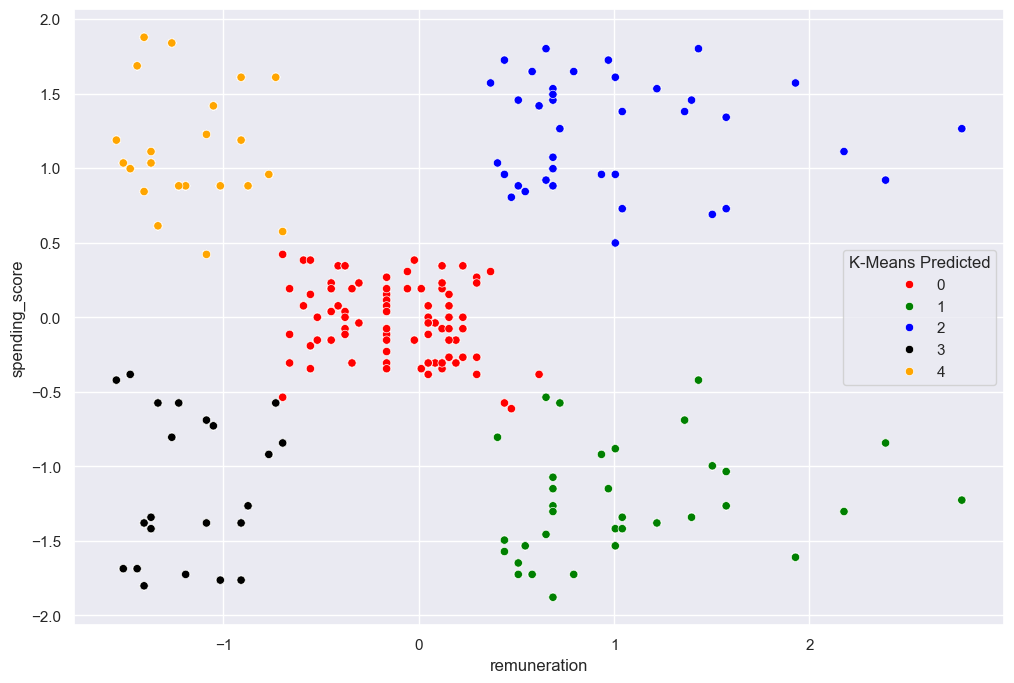

In [139]:
# Visualising the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})

sns.scatterplot(x='remuneration' , 
                y ='spending_score',
                data=df2 ,
                hue='K-Means Predicted',
                palette=['red', 'green', 'blue', 'black', 'orange'])
# Save the output as 'chart6.png'
plt.savefig('chart9.png')

##  Insights and observations

> Group 2 has a better cluster distribution. Indicating a clear exihibiton of dinstinct pattern.

> The largest cluster is '0' with 774 observations. This represent 39% of the total observation 
This is the likely dominate group within the dataset.

> Both clusteres '1' and '2' are moderately sized. They are smaller when compared to size 0 and they both represent 
a total of 686 observations (356 and 330 respectively). This represents 34% of the total observation.

> Clusters '3' and '4' are smaller, the combined observation in the cluseters is 540 (271 and 269 respectively).
This is 27% of the entire observation or dataset.Smaller clusters may capture specific or less common patterns.

##### Relative to the business question, how useful are remuneration and spending scores data?

> The clustering indicates that Members of clusters '0', '1', and '2' fall within the top 75% of income earners.
767 members of cluster '0' fall within the top 75% spend_score.followed by clusters '2' and '3'.

> Business Strategy:
> - Focus marketing efforts on understanding and catering to the needs of the dominant cluster ('0'), and 2 as ! represents a significant portion of the customer base and '2' exhibits a dinstinct speration of partern due to the closeness of the cluster data points.

> - Tailor strategies for clusters '1' and '2' to address the characteristics that make them moderately sized groups.

> - Explore opportunities in smaller clusters ('3' and '4') by understanding their specific preferences and needs.

> Further Analysis:
    
> - Conduct additional analyses, such as feature importance within clusters, to identify key factors influencing the clustering.

> - Consider incorporating additional external data sources to enrich the understanding of customer segments.


# NLP
Customer reviews were downloaded from the website of Turtle Games. This data will be used to steer the marketing department on how to approach future campaigns.  Identifying the 15 most common words used in online product reviews. Also a list of the top 20 positive and negative reviews received from the website.

### Importing the necessary libraries

In [313]:
# Import all the necessary packages.
import pandas as pd
import numpy as np
import nltk 
import os 
import matplotlib.pyplot as plt

# nltk.download ('punkt').
# nltk.download ('stopwords').

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from textblob import TextBlob
from scipy.stats import norm

# Import Counter.
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

### Reading the data

In [ ]:
# Load the data set as df3.
df3 = pd.read_csv('reviews.csv'

## Data Exploration

In [334]:
# View DataFrame.
df3

,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap
...,...,...,...,...,...,...,...,...,...
1995,Female,37,84.46,69,4031,PhD,977,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,Female,43,92.66,8,539,PhD,979,Great game. Did not think I would like it whe...,Super fun
1997,Male,34,92.66,91,5614,graduate,1012,Great game for all.........\nKeeps the mind ni...,Great Game
1998,Male,34,98.40,16,1048,PhD,1031,fun game!,Four Stars


In [335]:
# Explore data set.
def sense_check_dataframe(df):
    # Display basic information about the DataFrame
    print("DataFrame Info:")
    print(df.info())

    # Display the first few rows of the DataFrame
    print("\nFirst Few Rows:")
    print(df.head())

    # Check for missing values
    print("\nMissing Values:")
    print(df.isnull().sum())

    # Display summary statistics
    print("\nSummary Statistics:")
    print(df.describe())

    # Check for duplicates
    print("\nDuplicate Rows:")
    print(df[df.duplicated()])
    
# sense_check_dataframe function with df3
sense_check_dataframe(df3)

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2   remuneration    2000 non-null   float64
 3   spending_score  2000 non-null   int64  
 4   loyalty_points  2000 non-null   int64  
 5   education       2000 non-null   object 
 6   product         2000 non-null   int64  
 7   review          2000 non-null   object 
 8   summary         2000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 140.8+ KB
None

First Few Rows:
   gender  age  remuneration  spending_score  loyalty_points education  \
0    Male   18         12.30              39             210  graduate   
1    Male   23         12.30              81             524  graduate   
2  Female   22         13.12               6              40  graduate   
3

## Data cleaning

In [336]:
# Keep necessary columns. Drop unnecessary columns.
df3 = df3[['review','summary']]

# View DataFrame.
df3

,review,summary
0,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,As my review of GF9's previous screens these w...,Money trap
...,...,...
1995,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,Great game. Did not think I would like it whe...,Super fun
1997,Great game for all.........\nKeeps the mind ni...,Great Game
1998,fun game!,Four Stars


In [337]:
# Determine if there are any missing values.
df3.isna().sum()

review     0
summary    0
dtype: int64

##  Prepare the data for NLP

### 2Change to lower case and join the elements in each of the columns respectively (review and summary)

In [338]:
# Review: Change all to lower case and join with a space.
df3['review'] = df3['review'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Preview the result.
df3['review'].head()

0    when it comes to a dm's screen, the space on t...
1    an open letter to galeforce9*: your unpainted ...
2    nice art, nice printing. why two panels are fi...
3    amazing buy! bought it as a gift for our new d...
4    as my review of gf9's previous screens these w...
Name: review, dtype: object

In [339]:
# Summary: Change all to lower case and join with a space.
df3['summary'] = df3['summary'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Preview the result.
df3['summary'].head()

0    the fact that 50% of this space is wasted on a...
1    another worthless dungeon master's screen from...
2                      pretty, but also pretty useless
3                                           five stars
4                                           money trap
Name: summary, dtype: object

### Replace punctuation in each of the columns respectively (review and summary)

In [340]:
# Replace all the punctuations in review column.
df3['review'] = df3['review'].str.replace('[^\w\s]','')

# View output.
df3['review'].head()

0    when it comes to a dm's screen, the space on t...
1    an open letter to galeforce9*: your unpainted ...
2    nice art, nice printing. why two panels are fi...
3    amazing buy! bought it as a gift for our new d...
4    as my review of gf9's previous screens these w...
Name: review, dtype: object

In [341]:
# Replace all the puncuations in summary column.
df3['summary'] = df3['summary'].str.replace('[^\w\s]','')

# View output.
df3['summary'].head()

0    the fact that 50% of this space is wasted on a...
1    another worthless dungeon master's screen from...
2                      pretty, but also pretty useless
3                                           five stars
4                                           money trap
Name: summary, dtype: object

### Drop duplicates in both columns

In [342]:
# view duplicates in column.
df3.duplicated().sum()

25

In [343]:
# Drop duplicates.
df3 = df3.drop_duplicates()

# Preview data.
df3.reset_index(inplace=True)
df3.head()

,index,review,summary
0,0,"when it comes to a dm's screen, the space on t...",the fact that 50% of this space is wasted on a...
1,1,an open letter to galeforce9*: your unpainted ...,another worthless dungeon master's screen from...
2,2,"nice art, nice printing. why two panels are fi...","pretty, but also pretty useless"
3,3,amazing buy! bought it as a gift for our new d...,five stars
4,4,as my review of gf9's previous screens these w...,money trap


In [344]:
# View the shape of the data.
df3.shape

(1975, 3)

##  Tokenise and create wordclouds

In [345]:
# Create new DataFrame (copy DataFrame).
tokenised_df3 = df3.copy()

# View DataFrame.
tokenised_df3

,index,review,summary
0,0,"when it comes to a dm's screen, the space on t...",the fact that 50% of this space is wasted on a...
1,1,an open letter to galeforce9*: your unpainted ...,another worthless dungeon master's screen from...
2,2,"nice art, nice printing. why two panels are fi...","pretty, but also pretty useless"
3,3,amazing buy! bought it as a gift for our new d...,five stars
4,4,as my review of gf9's previous screens these w...,money trap
...,...,...,...
1970,1995,the perfect word game for mixed ages (with mom...,the perfect word game for mixed ages (with mom
1971,1996,great game. did not think i would like it when...,super fun
1972,1997,great game for all......... keeps the mind nim...,great game
1973,1998,fun game!,four stars


In [346]:
# Import nltk and download nltk's resources to assist with tokenisation.
import nltk

nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /Users/adeola/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [347]:
# Apply tokenisation to both columns.

# Tokenize 'review' column
tokenised_df3['review_tokens'] = tokenised_df3['review'].apply(lambda x: word_tokenize(x))

# Tokenize 'summary' column
tokenised_df3['summary_tokens'] = tokenised_df3['summary'].apply(lambda x: word_tokenize(x))

# View DataFrame.
print(tokenised_df3[['index', 'review_tokens', 'summary_tokens']])

      index                                      review_tokens  \
0         0  [when, it, comes, to, a, dm, 's, screen, ,, th...   
1         1  [an, open, letter, to, galeforce9, *, :, your,...   
2         2  [nice, art, ,, nice, printing, ., why, two, pa...   
3         3  [amazing, buy, !, bought, it, as, a, gift, for...   
4         4  [as, my, review, of, gf9, 's, previous, screen...   
...     ...                                                ...   
1970   1995  [the, perfect, word, game, for, mixed, ages, (...   
1971   1996  [great, game, ., did, not, think, i, would, li...   
1972   1997  [great, game, for, all, ........., keeps, the,...   
1973   1998                                     [fun, game, !]   
1974   1999  [this, game, is, fun, ., a, lot, like, scrabbl...   

                                         summary_tokens  
0     [the, fact, that, 50, %, of, this, space, is, ...  
1     [another, worthless, dungeon, master, 's, scre...  
2               [pretty, ,, but, 

In [348]:
# String all the comments together in a single variable .
# Create an empty string variable.
all_reviews = ''
for i in range(tokenised_df3.shape[0]):
    # Add each comment.
    all_reviews = all_reviews + tokenised_df3['review'][i]
    
all_summary = ''
for i in range(tokenised_df3.shape[0]):
    # Add each comment.
    all_summary = all_summary + tokenised_df3['summary'][i]

In [349]:
# Import along with matplotlib and seaborn for visualisation.
from wordcloud import WordCloud 
import matplotlib.pyplot as plt 
import seaborn as s

In [350]:
# Review: Create a word cloud.

# Set the colour palette.
sns.set(color_codes=True)

# Create a WordCloud object.
word_cloud = WordCloud(width = 1600, height = 900, 
                background_color ='white',
                colormap = 'plasma', 
                stopwords = 'none',
                min_font_size = 10).generate(all_reviews) 

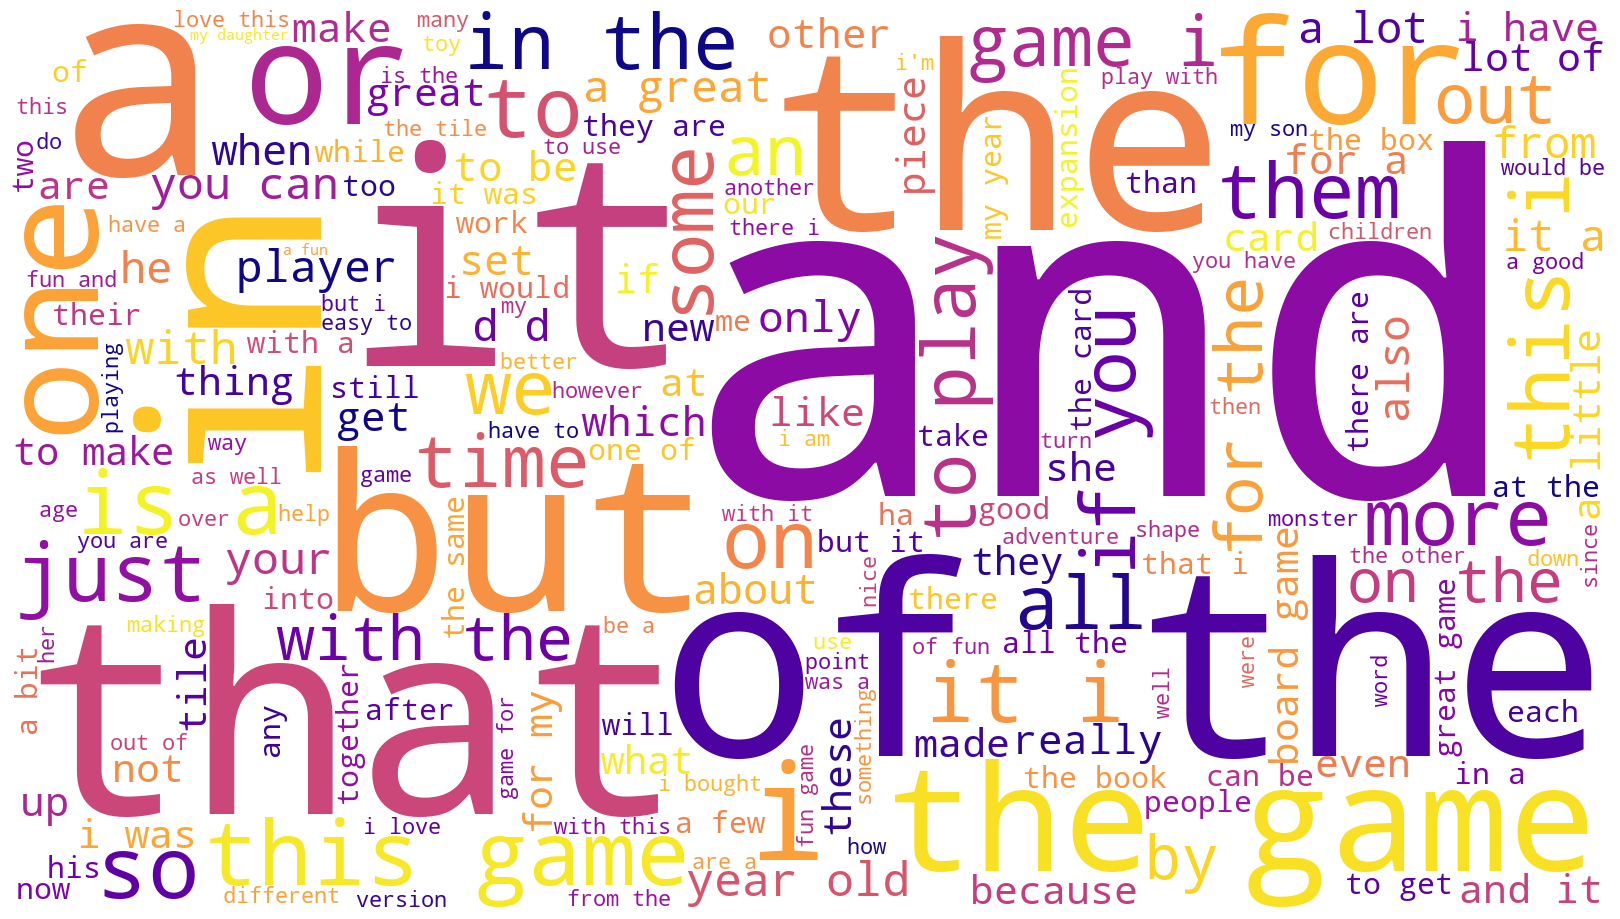

In [351]:
# Review: Plot the WordCloud image.
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(word_cloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

In [352]:
# Summary: Create a word cloud.

# Set the colour palette.
sns.set(color_codes=True)

# Create a WordCloud object.
word_cloud = WordCloud(width = 1600, height = 900, 
                background_color ='white',
                colormap = 'plasma', 
                stopwords = 'none',
                min_font_size = 10).generate(all_summary) 

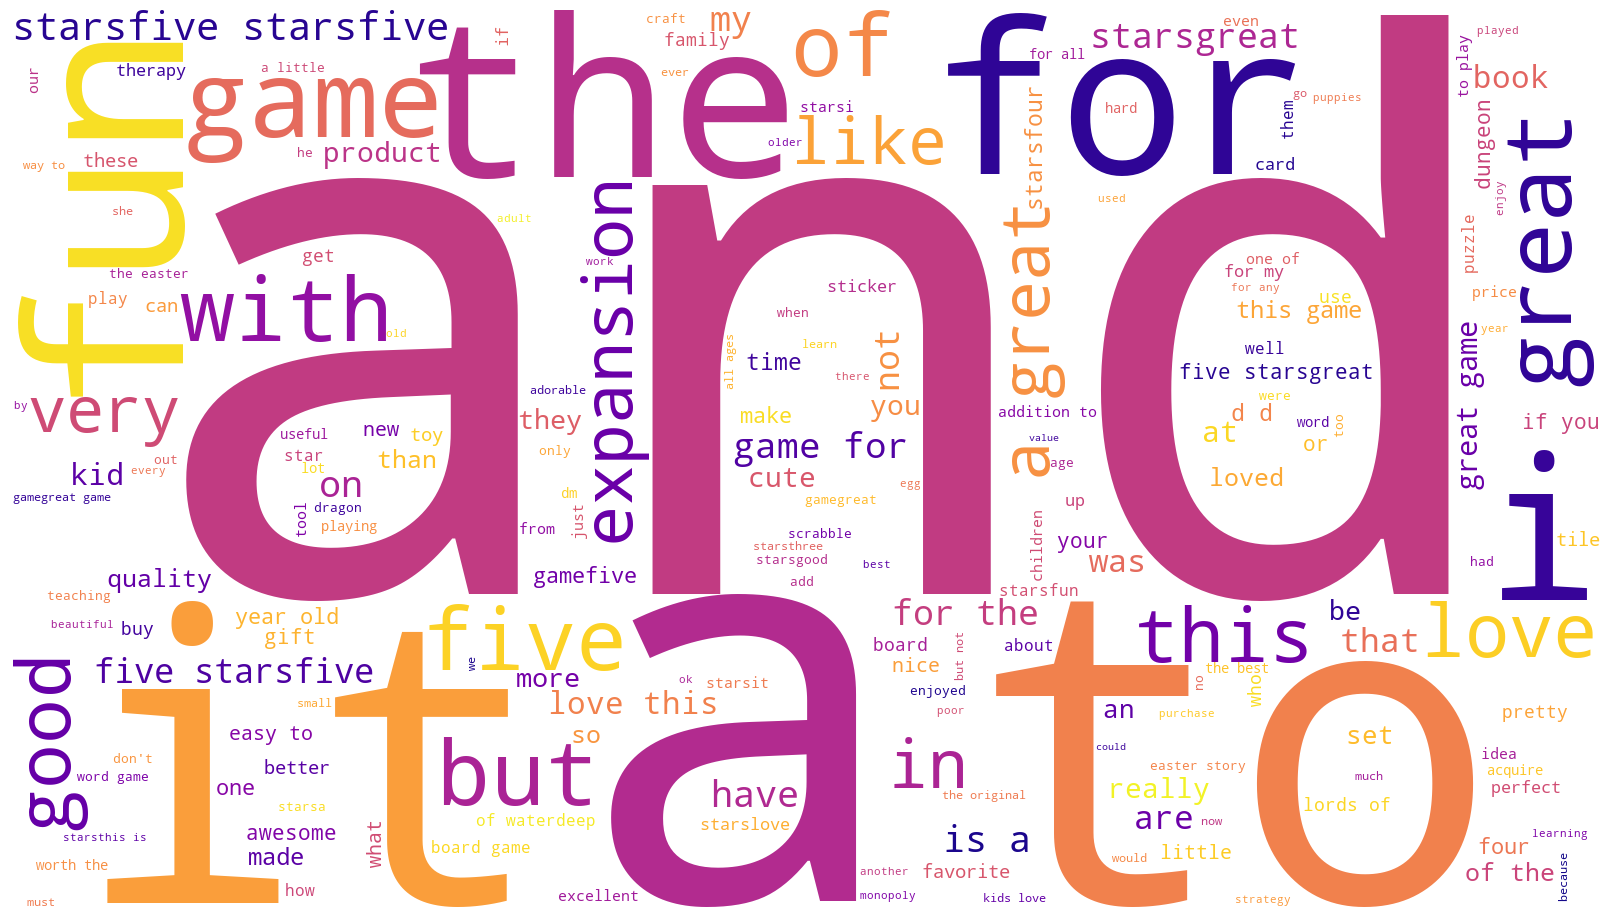

In [353]:
# Summary: Plot the WordCloud image.
# Review: Plot the WordCloud image.
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(word_cloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

##  Frequency distribution and polarity

### Create frequency distribution

In [354]:
# View DataFrame.
review_tokens = tokenised_df3['review_tokens'].head()
review_tokens

0    [when, it, comes, to, a, dm, 's, screen, ,, th...
1    [an, open, letter, to, galeforce9, *, :, your,...
2    [nice, art, ,, nice, printing, ., why, two, pa...
3    [amazing, buy, !, bought, it, as, a, gift, for...
4    [as, my, review, of, gf9, 's, previous, screen...
Name: review_tokens, dtype: object

In [355]:
# View DataFrame.
summary_tokens = tokenised_df3['summary_tokens'].head()
summary_tokens

0    [the, fact, that, 50, %, of, this, space, is, ...
1    [another, worthless, dungeon, master, 's, scre...
2              [pretty, ,, but, also, pretty, useless]
3                                        [five, stars]
4                                        [money, trap]
Name: summary_tokens, dtype: object

In [356]:
# Define an empty list of review tokens.
review_tokens = []

for i in range(tokenised_df3.shape[0]):
    # Add each token to the list.
    review_tokens = review_tokens + tokenised_df3['review_tokens'][i]

In [357]:
# Determine the frequency distribution.
# Import the FreqDist class.
from nltk.probability import FreqDist

# Calculate the frequency distribution.
fdist = FreqDist(review_tokens)

# Preview data.
fdist

FreqDist({'.': 6470, 'the': 5457, ',': 3793, 'and': 3247, 'a': 3169, 'to': 3163, 'of': 2491, 'it': 2488, 'i': 2345, 'is': 1834, ...})

In [358]:
# Define an empty list of summary tokens.
summary_tokens = []

for i in range(tokenised_df3.shape[0]):
    # Add each token to the list.
    summary_tokens = summary_tokens + tokenised_df3['summary_tokens'][i]

In [364]:
# Determine the frequency distribution.
# Import the FreqDist class.
from nltk.probability import FreqDist

# Calculate the frequency distribution.
fdist = FreqDist(summary_tokens)

# Preview data.
fdist

FreqDist({'stars': 441, '!': 426, 'five': 356, 'game': 318, 'great': 294, 'the': 261, 'a': 239, 'for': 232, '.': 218, 'fun': 217, ...})

###  Remove alphanumeric characters and stopwords

In [365]:
# Delete all the alpanum.
# Filter out tokens that are neither alphabets nor numbers (to eliminate punctuation marks, etc.).
review_no_alphanum = [word for word in review_tokens if word.isalnum()]
# Display the DataFrame with column excluding alphanumeric characters
review_no_alphanum

['when',
 'it',
 'comes',
 'to',
 'a',
 'dm',
 'screen',
 'the',
 'space',
 'on',
 'the',
 'screen',
 'itself',
 'is',
 'at',
 'an',
 'absolute',
 'premium',
 'the',
 'fact',
 'that',
 '50',
 'of',
 'this',
 'space',
 'is',
 'wasted',
 'on',
 'art',
 'and',
 'not',
 'terribly',
 'informative',
 'or',
 'needed',
 'art',
 'as',
 'well',
 'makes',
 'it',
 'completely',
 'useless',
 'the',
 'only',
 'reason',
 'that',
 'i',
 'gave',
 'it',
 '2',
 'stars',
 'and',
 'not',
 '1',
 'was',
 'that',
 'technically',
 'speaking',
 'it',
 'can',
 'at',
 'least',
 'still',
 'stand',
 'up',
 'to',
 'block',
 'your',
 'notes',
 'and',
 'dice',
 'rolls',
 'other',
 'than',
 'that',
 'it',
 'drops',
 'the',
 'ball',
 'completely',
 'an',
 'open',
 'letter',
 'to',
 'galeforce9',
 'your',
 'unpainted',
 'miniatures',
 'are',
 'very',
 'not',
 'bad',
 'your',
 'spell',
 'cards',
 'are',
 'great',
 'your',
 'board',
 'games',
 'are',
 'meh',
 'your',
 'dm',
 'screens',
 'however',
 'are',
 'freaking',
 'te

In [366]:
# Delete all the alpanum.
# Filter out tokens that are neither alphabets nor numbers (to eliminate punctuation marks, etc.).
summary_no_alphanum = [word for word in summary_tokens if word.isalnum()]
# Display the DataFrame with column excluding alphanumeric characters
summary_no_alphanum

['the',
 'fact',
 'that',
 '50',
 'of',
 'this',
 'space',
 'is',
 'wasted',
 'on',
 'art',
 'and',
 'not',
 'terribly',
 'informative',
 'or',
 'needed',
 'art',
 'another',
 'worthless',
 'dungeon',
 'master',
 'screen',
 'from',
 'galeforce9',
 'pretty',
 'but',
 'also',
 'pretty',
 'useless',
 'five',
 'stars',
 'money',
 'trap',
 'five',
 'stars',
 'best',
 'gm',
 'screen',
 'ever',
 'five',
 'stars',
 'great',
 'but',
 'could',
 'be',
 'even',
 'better',
 'another',
 'missed',
 'opportunity',
 'not',
 'a',
 'value',
 'add',
 'to',
 'the',
 'product',
 'line',
 'five',
 'stars',
 'love',
 'the',
 'map',
 'not',
 'a',
 'general',
 'dm',
 'screen',
 'very',
 'weak',
 'game',
 'fell',
 'completely',
 'flat',
 'five',
 'stars',
 'good',
 'book',
 'buckley',
 'was',
 'a',
 'card',
 'mommer',
 'very',
 'advanced',
 'but',
 'as',
 'good',
 'as',
 'it',
 'gets',
 'you',
 'better',
 'know',
 'what',
 'you',
 'getting',
 'into',
 'do',
 'bother',
 'the',
 'worst',
 'value',
 'i',
 'ever',
 

In [367]:
# Remove all the stopwords
# Download the stopwords.
nltk.download('stopwords')

# Import the package.
from nltk.corpus import stopwords

# Create a set of English stopwords.
stop_words = set(stopwords.words('english'))

# Create an empty list for the filtered words.
filtered_review = []

# Filter the review words.
for each_word in review_no_alphanum:
    if each_word not in stop_words:
        filtered_review.append(each_word)
        
# Display the filtered list.      
filtered_review

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/adeola/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['comes',
 'dm',
 'screen',
 'space',
 'screen',
 'absolute',
 'premium',
 'fact',
 '50',
 'space',
 'wasted',
 'art',
 'terribly',
 'informative',
 'needed',
 'art',
 'well',
 'makes',
 'completely',
 'useless',
 'reason',
 'gave',
 '2',
 'stars',
 '1',
 'technically',
 'speaking',
 'least',
 'still',
 'stand',
 'block',
 'notes',
 'dice',
 'rolls',
 'drops',
 'ball',
 'completely',
 'open',
 'letter',
 'galeforce9',
 'unpainted',
 'miniatures',
 'bad',
 'spell',
 'cards',
 'great',
 'board',
 'games',
 'meh',
 'dm',
 'screens',
 'however',
 'freaking',
 'terrible',
 'still',
 'waiting',
 'single',
 'screen',
 'polluted',
 'pointless',
 'artwork',
 'useful',
 'tables',
 'created',
 'single',
 'use',
 'screen',
 'useful',
 'running',
 'storm',
 'king',
 'thunder',
 'adventure',
 'even',
 'despite',
 'fact',
 'geared',
 'adventure',
 'path',
 'usefulness',
 'negligible',
 'best',
 'massive',
 'swath',
 'inner',
 'panel',
 'wasted',
 'artwork',
 'bloated',
 'overland',
 'map',
 'could',


In [363]:
# Create an empty list for the filtered words.
filtered_summary = []

# Filter the review words.
for each_word in summary_no_alphanum:
    if each_word not in stop_words:
        filtered_summary.append(each_word)
        
# Display the filtered list.      
filtered_summary

['fact',
 '50',
 'space',
 'wasted',
 'art',
 'terribly',
 'informative',
 'needed',
 'art',
 'another',
 'worthless',
 'dungeon',
 'master',
 'screen',
 'galeforce9',
 'pretty',
 'also',
 'pretty',
 'useless',
 'five',
 'stars',
 'money',
 'trap',
 'five',
 'stars',
 'best',
 'gm',
 'screen',
 'ever',
 'five',
 'stars',
 'great',
 'could',
 'even',
 'better',
 'another',
 'missed',
 'opportunity',
 'value',
 'add',
 'product',
 'line',
 'five',
 'stars',
 'love',
 'map',
 'general',
 'dm',
 'screen',
 'weak',
 'game',
 'fell',
 'completely',
 'flat',
 'five',
 'stars',
 'good',
 'book',
 'buckley',
 'card',
 'mommer',
 'advanced',
 'good',
 'gets',
 'better',
 'know',
 'getting',
 'bother',
 'worst',
 'value',
 'ever',
 'seen',
 'enough',
 'product',
 'good',
 'product',
 'temporary',
 'tattoos',
 'good',
 'gift',
 'huge',
 'hit',
 'gorgeous',
 'pictures',
 'five',
 'stars',
 'wonderful',
 'designs',
 'wow',
 'great',
 'coloring',
 'book',
 'nice',
 'book',
 'great',
 'pictures',
 'pe

###  Create wordcloud without stopwords

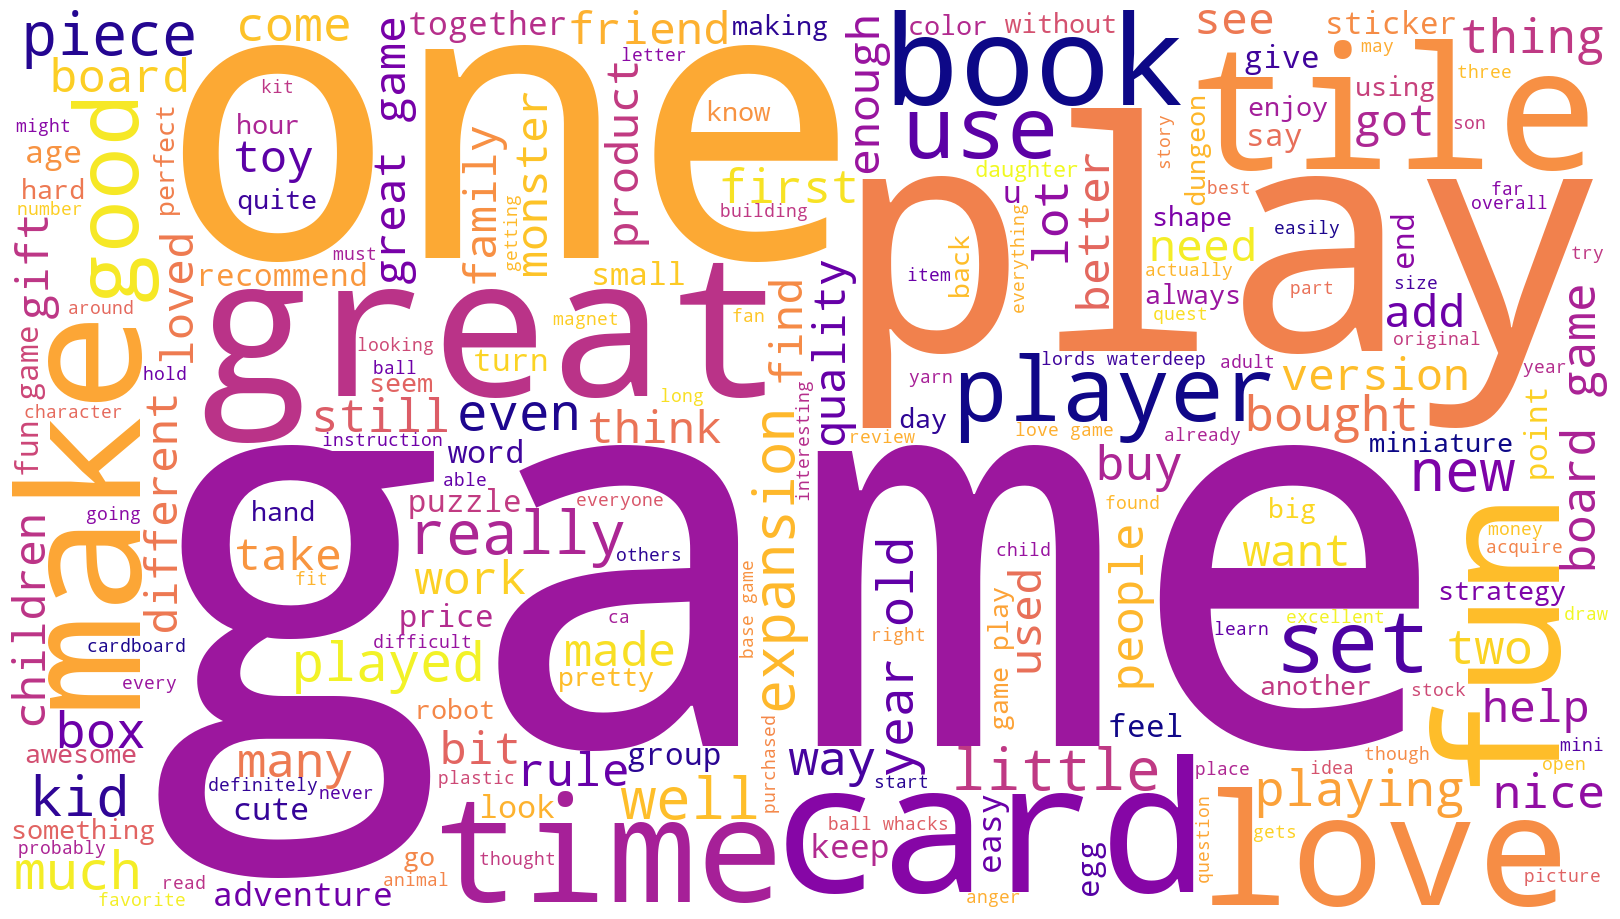

In [247]:
# Convert the list of tokens to a single string
filtered_review = ' '.join(filtered_review)
# Create a wordcloud without stop words.
wordcloud = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                min_font_size = 10).generate(filtered_review) 

# Plot the WordCloud image.                        
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

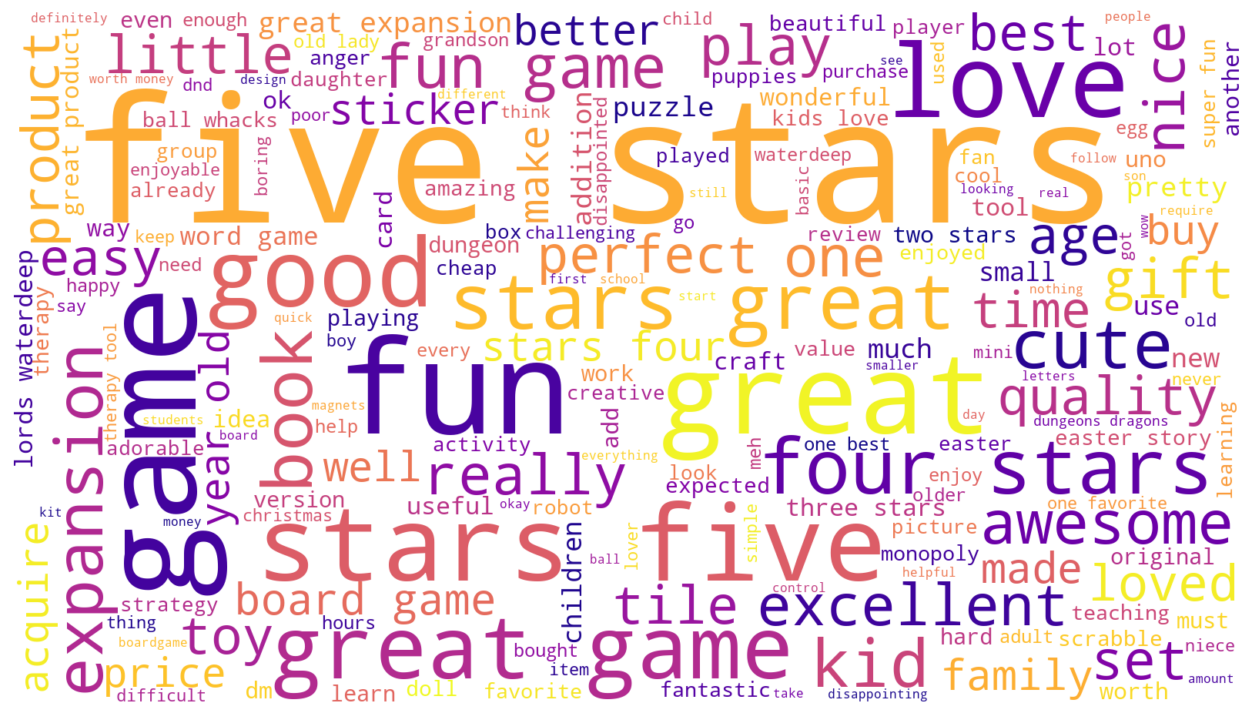

In [248]:
# Convert the list of tokens to a single string
filtered_summary = ' '.join(filtered_summary)
# Create a WordCloud without stop words
wordcloud = WordCloud(width=1600, height=900, 
                      background_color='white', 
                      colormap='plasma', 
                      min_font_size=10).generate(filtered_summary)

# Plot the WordCloud image                        
plt.figure(figsize=(16, 9), facecolor=None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Identify 15 most common words and polarity

In [251]:
# Recovering filtered review & summary
# Create an empty list for the filtered words.
filtered_review = []

# Filter the review words.
for each_word in review_no_alphanum:
    if each_word not in stop_words:
        filtered_review.append(each_word)
        
# Display the filtered list.      
filtered_review

['comes',
 'dm',
 'screen',
 'space',
 'screen',
 'absolute',
 'premium',
 'fact',
 '50',
 'space',
 'wasted',
 'art',
 'terribly',
 'informative',
 'needed',
 'art',
 'well',
 'makes',
 'completely',
 'useless',
 'reason',
 'gave',
 '2',
 'stars',
 '1',
 'technically',
 'speaking',
 'least',
 'still',
 'stand',
 'block',
 'notes',
 'dice',
 'rolls',
 'drops',
 'ball',
 'completely',
 'open',
 'letter',
 'galeforce9',
 'unpainted',
 'miniatures',
 'bad',
 'spell',
 'cards',
 'great',
 'board',
 'games',
 'meh',
 'dm',
 'screens',
 'however',
 'freaking',
 'terrible',
 'still',
 'waiting',
 'single',
 'screen',
 'polluted',
 'pointless',
 'artwork',
 'useful',
 'tables',
 'created',
 'single',
 'use',
 'screen',
 'useful',
 'running',
 'storm',
 'king',
 'thunder',
 'adventure',
 'even',
 'despite',
 'fact',
 'geared',
 'adventure',
 'path',
 'usefulness',
 'negligible',
 'best',
 'massive',
 'swath',
 'inner',
 'panel',
 'wasted',
 'artwork',
 'bloated',
 'overland',
 'map',
 'could',


In [261]:
# Create an empty list for the filtered words.
filtered_summary = []

# Filter the summary words.
for each_word in summary_no_alphanum:
    if each_word not in stop_words:
        filtered_summary.append(each_word)
        
# Display the filtered list.      
filtered_summary

['fact',
 '50',
 'space',
 'wasted',
 'art',
 'terribly',
 'informative',
 'needed',
 'art',
 'another',
 'worthless',
 'dungeon',
 'master',
 'screen',
 'galeforce9',
 'pretty',
 'also',
 'pretty',
 'useless',
 'five',
 'stars',
 'money',
 'trap',
 'five',
 'stars',
 'best',
 'gm',
 'screen',
 'ever',
 'five',
 'stars',
 'great',
 'could',
 'even',
 'better',
 'another',
 'missed',
 'opportunity',
 'value',
 'add',
 'product',
 'line',
 'five',
 'stars',
 'love',
 'map',
 'general',
 'dm',
 'screen',
 'weak',
 'game',
 'fell',
 'completely',
 'flat',
 'five',
 'stars',
 'good',
 'book',
 'buckley',
 'card',
 'mommer',
 'advanced',
 'good',
 'gets',
 'better',
 'know',
 'getting',
 'bother',
 'worst',
 'value',
 'ever',
 'seen',
 'enough',
 'product',
 'good',
 'product',
 'temporary',
 'tattoos',
 'good',
 'gift',
 'huge',
 'hit',
 'gorgeous',
 'pictures',
 'five',
 'stars',
 'wonderful',
 'designs',
 'wow',
 'great',
 'coloring',
 'book',
 'nice',
 'book',
 'great',
 'pictures',
 'pe

In [371]:
# Determine the 15 most common words.
# Import the Counter class.
from collections import Counter

# Generate a DataFrame from Counter.
review_counts = pd.DataFrame(Counter(filtered_review).most_common(15),
                      columns=['Word', 'Frequency']).set_index('Word')

# Preview data.
review_counts

,Frequency
Word,
game,1693
great,587
fun,555
one,532
play,504
like,414
love,325
get,320
really,318


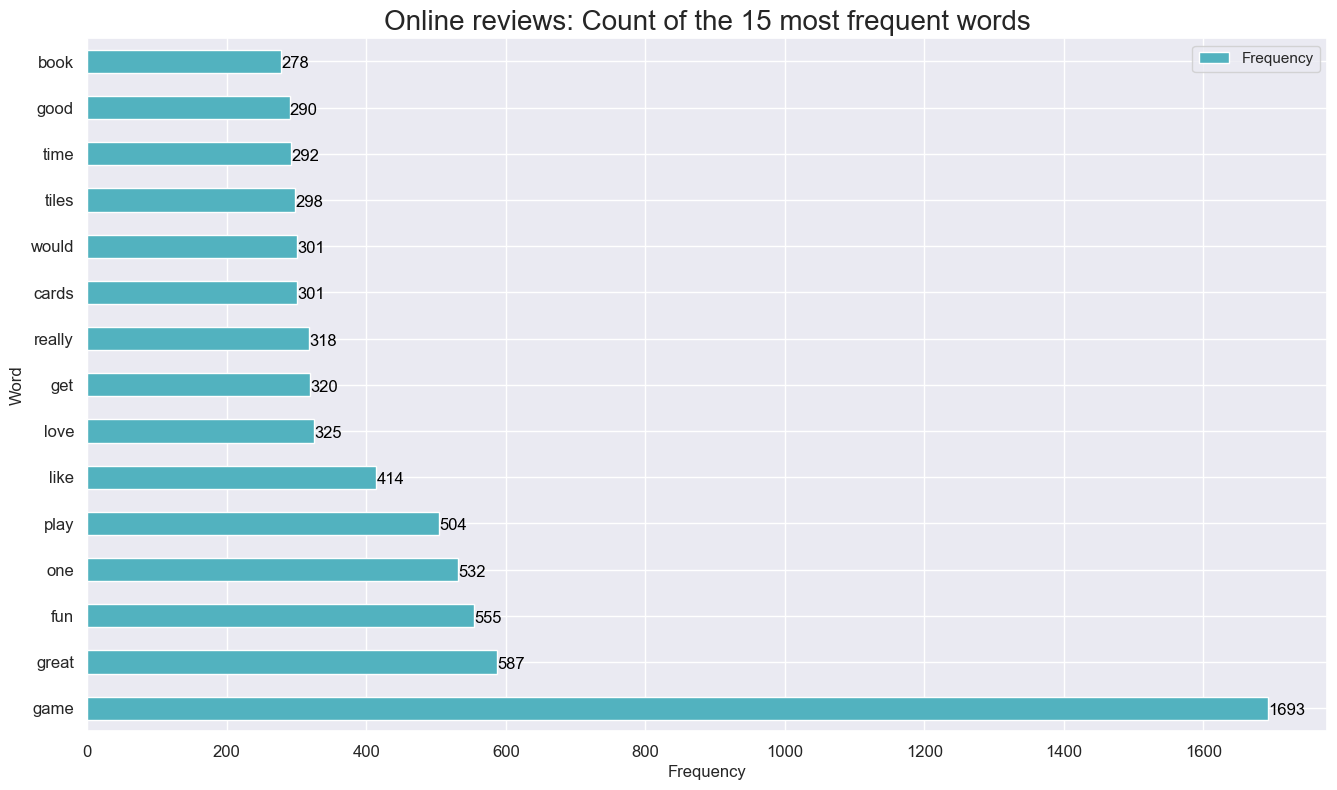

In [412]:
# Set the plot type.
ax = review_counts.plot(kind='barh', figsize=(16, 9), fontsize=12,
                 color ='#52B2BF')

# Set the labels.
ax.set_xlabel('Frequency', fontsize=12)
ax.set_ylabel('Word', fontsize=12)
ax.set_title("Online reviews: Count of the 15 most frequent words",
             fontsize=20)

# Draw the bar labels.
for i in ax.patches:
    ax.text(i.get_width()+.41, i.get_y()+.1, str(round((i.get_width()), 2)),
            fontsize=12, color='black')

In [372]:
# Determine the 15 most common words.
# Import the Counter class.
from collections import Counter

# Generate a DataFrame from Counter.
summary_counts = pd.DataFrame(Counter(filtered_summary).most_common(15),
                      columns=['Word', 'Frequency']).set_index('Word')

# Preview data.
summary_counts

,Frequency
Word,
stars,441
five,356
game,318
great,294
fun,217
love,93
good,92
four,58
like,54


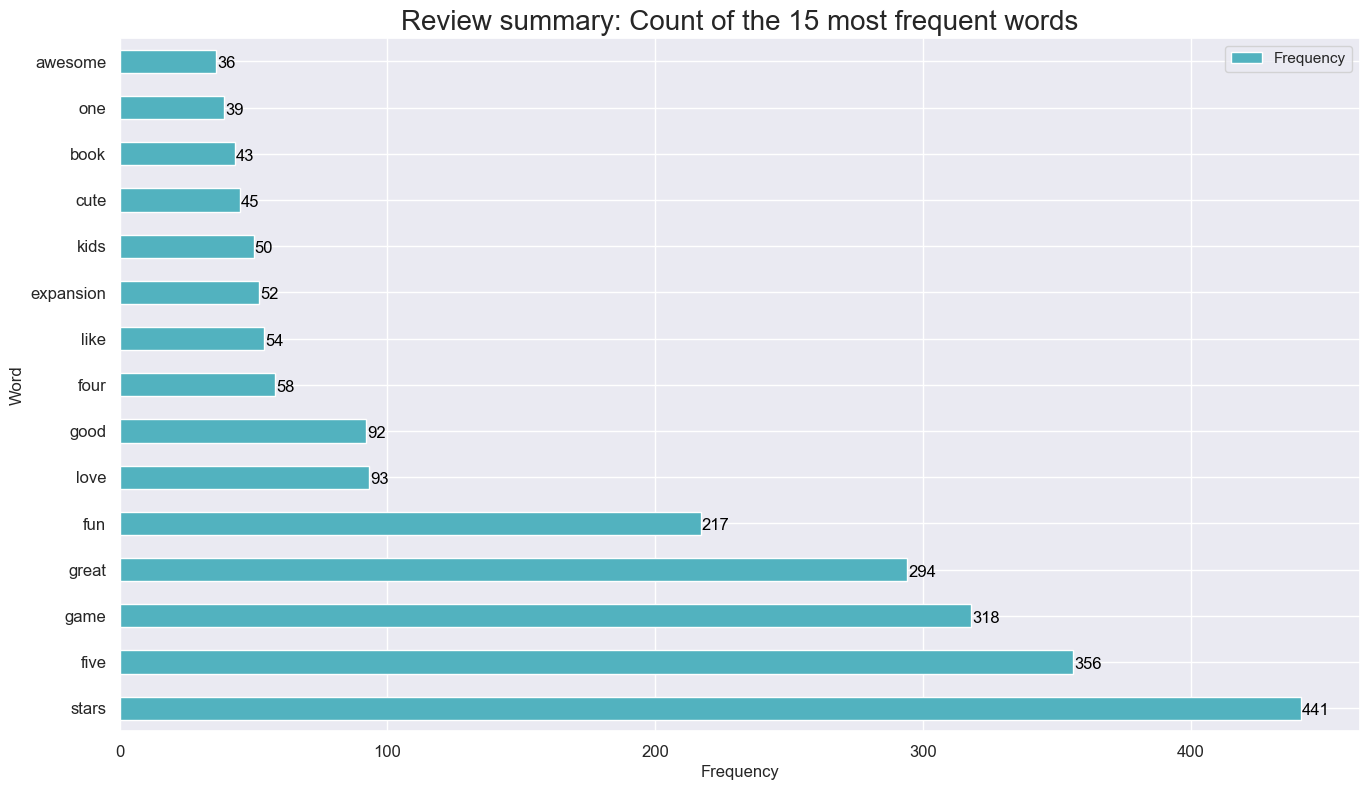

In [410]:
# Set the plot type.
ax = summary_counts.plot(kind='barh', figsize=(16, 9), fontsize=12,
                 color='#52B2BF')

# Set the labels.
ax.set_xlabel('Frequency', fontsize=12)
ax.set_ylabel('Word', fontsize=12)
ax.set_title("Review summary: Count of the 15 most frequent words",
             fontsize=20)

# Draw the bar labels.
for i in ax.patches:
    ax.text(i.get_width()+.41, i.get_y()+.1, str(round((i.get_width()), 2)),
            fontsize=12, color='black')

##  Review polarity and sentiment

### Plot histograms of polarity (use 15 bins) and sentiment scores for the respective columns.

In [373]:
from textblob import TextBlob
# Provided function.
def generate_polarity(comment):
    '''Extract polarity score (-1 to +1) for each comment'''
    return TextBlob(comment).sentiment[0]

In [374]:

# Determine polarity of both columns. 
# Apply the generate_polarity function to 'review' and 'summary' columns
tokenised_df3['review_polarity'] = tokenised_df3['review'].apply(generate_polarity)
tokenised_df3['summary_polarity'] = tokenised_df3['summary'].apply(generate_polarity)

# Display the DataFrame with polarity scores
print(tokenised_df3[['index', 'review_polarity', 'summary_polarity']])

      index  review_polarity  summary_polarity
0         0        -0.036111          0.150000
1         1         0.035952         -0.800000
2         2         0.116640          0.000000
3         3         0.628788          0.000000
4         4        -0.316667          0.000000
...     ...              ...               ...
1970   1995         0.233929          0.200000
1971   1996         0.158333          0.316667
1972   1997         0.150000          0.200000
1973   1998        -0.100000          0.000000
1974   1999        -0.095833          0.050000

[1975 rows x 3 columns]


In [375]:
# Provided function.
def generate_subjectivity(comment):
    '''Extract subjectivity (0 to 1) for each comment'''
    return TextBlob(comment).sentiment.subjectivity

In [376]:
# Determine subjectivity of both columns. 
# Apply the generate_subjectivity function to 'review' and 'summary' columns
tokenised_df3['review_subjectivity'] = tokenised_df3['review'].apply(generate_subjectivity)
tokenised_df3['summary_subjectivity'] = tokenised_df3['summary'].apply(generate_subjectivity)

# Display the DataFrame with subjectivity
print(tokenised_df3[['index', 'review_subjectivity', 'summary_subjectivity']])

      index  review_subjectivity  summary_subjectivity
0         0             0.486111              0.500000
1         1             0.442976              0.900000
2         2             0.430435              0.733333
3         3             0.784848              0.000000
4         4             0.316667              0.000000
...     ...                  ...                   ...
1970   1995             0.564286              0.550000
1971   1996             0.310043              0.433333
1972   1997             0.575000              0.575000
1973   1998             0.300000              0.000000
1974   1999             0.366667              0.500000

[1975 rows x 3 columns]


In [377]:
#View DataFrame
tokenised_df3

,index,review,summary,review_tokens,summary_tokens,review_polarity,summary_polarity,review_subjectivity,summary_subjectivity
0,0,"when it comes to a dm's screen, the space on t...",the fact that 50% of this space is wasted on a...,"[when, it, comes, to, a, dm, 's, screen, ,, th...","[the, fact, that, 50, %, of, this, space, is, ...",-0.036111,0.150000,0.486111,0.500000
1,1,an open letter to galeforce9*: your unpainted ...,another worthless dungeon master's screen from...,"[an, open, letter, to, galeforce9, *, :, your,...","[another, worthless, dungeon, master, 's, scre...",0.035952,-0.800000,0.442976,0.900000
2,2,"nice art, nice printing. why two panels are fi...","pretty, but also pretty useless","[nice, art, ,, nice, printing, ., why, two, pa...","[pretty, ,, but, also, pretty, useless]",0.116640,0.000000,0.430435,0.733333
3,3,amazing buy! bought it as a gift for our new d...,five stars,"[amazing, buy, !, bought, it, as, a, gift, for...","[five, stars]",0.628788,0.000000,0.784848,0.000000
4,4,as my review of gf9's previous screens these w...,money trap,"[as, my, review, of, gf9, 's, previous, screen...","[money, trap]",-0.316667,0.000000,0.316667,0.000000
...,...,...,...,...,...,...,...,...,...
1970,1995,the perfect word game for mixed ages (with mom...,the perfect word game for mixed ages (with mom,"[the, perfect, word, game, for, mixed, ages, (...","[the, perfect, word, game, for, mixed, ages, (...",0.233929,0.200000,0.564286,0.550000
1971,1996,great game. did not think i would like it when...,super fun,"[great, game, ., did, not, think, i, would, li...","[super, fun]",0.158333,0.316667,0.310043,0.433333
1972,1997,great game for all......... keeps the mind nim...,great game,"[great, game, for, all, ........., keeps, the,...","[great, game]",0.150000,0.200000,0.575000,0.575000
1973,1998,fun game!,four stars,"[fun, game, !]","[four, stars]",-0.100000,0.000000,0.300000,0.000000


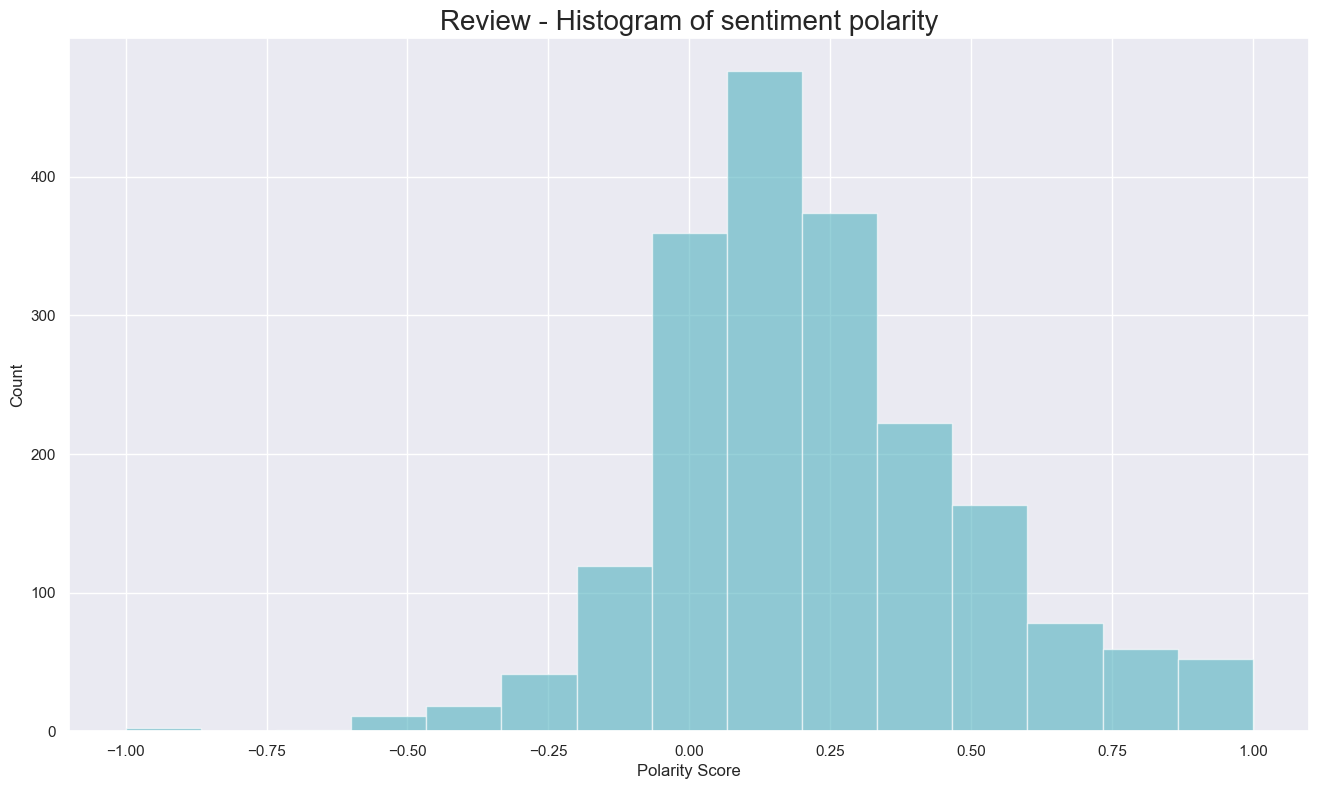

In [404]:
# Review: Create a histogram plot with bins = 15.
# Histogram of polarity

# Set the number of bins.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(tokenised_df3['review_polarity'], num_bins, facecolor='#52B2BF', alpha=0.6)

# Set the labels.
plt.xlabel('Polarity Score', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Review - Histogram of sentiment polarity', fontsize=20)

plt.show()

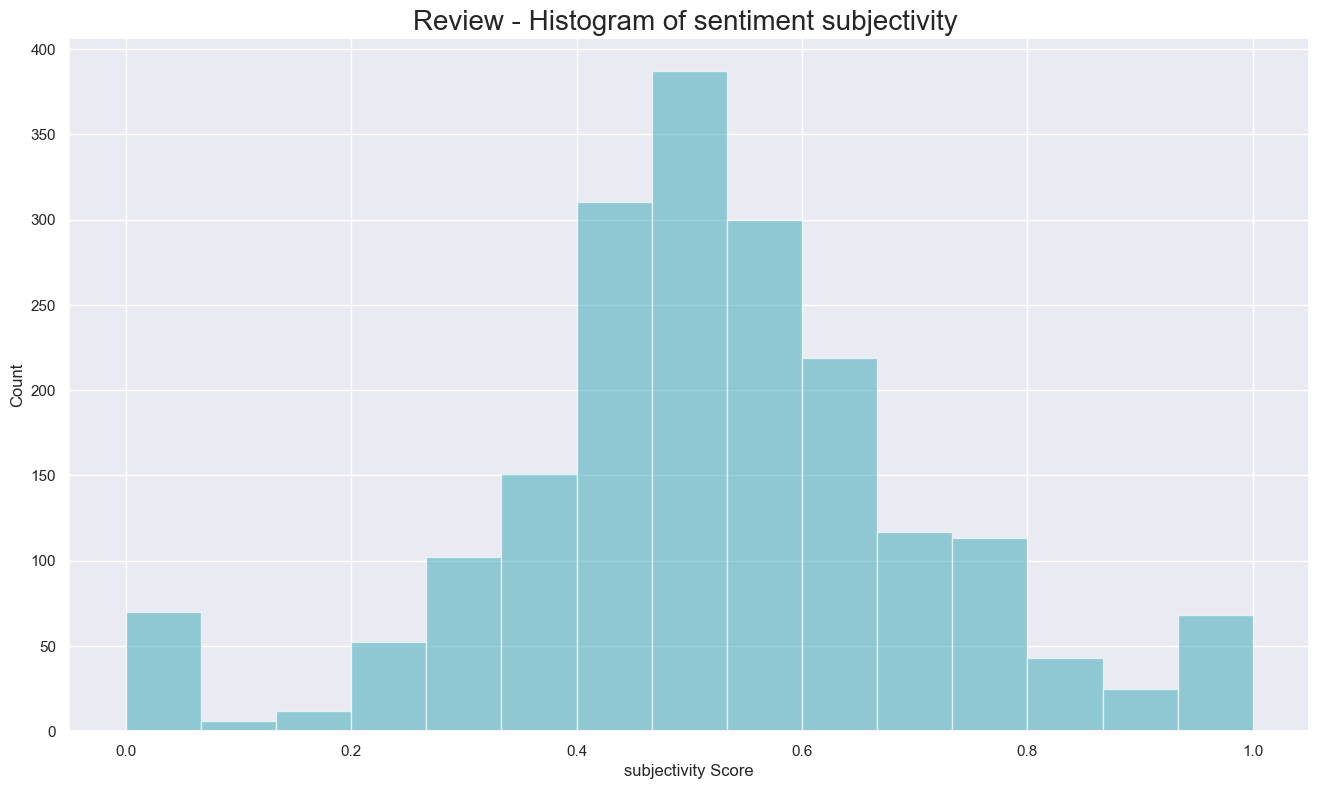

In [405]:
# Histogram of sentiment score
# Set the number of bins.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))
# Define the bars.
n, bins, patches = plt.hist(tokenised_df3['review_subjectivity'], num_bins, facecolor='#52B2BF', alpha=0.6)

# Set the labels.
plt.xlabel('subjectivity Score', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Review - Histogram of sentiment subjectivity ', fontsize=20)

plt.show()

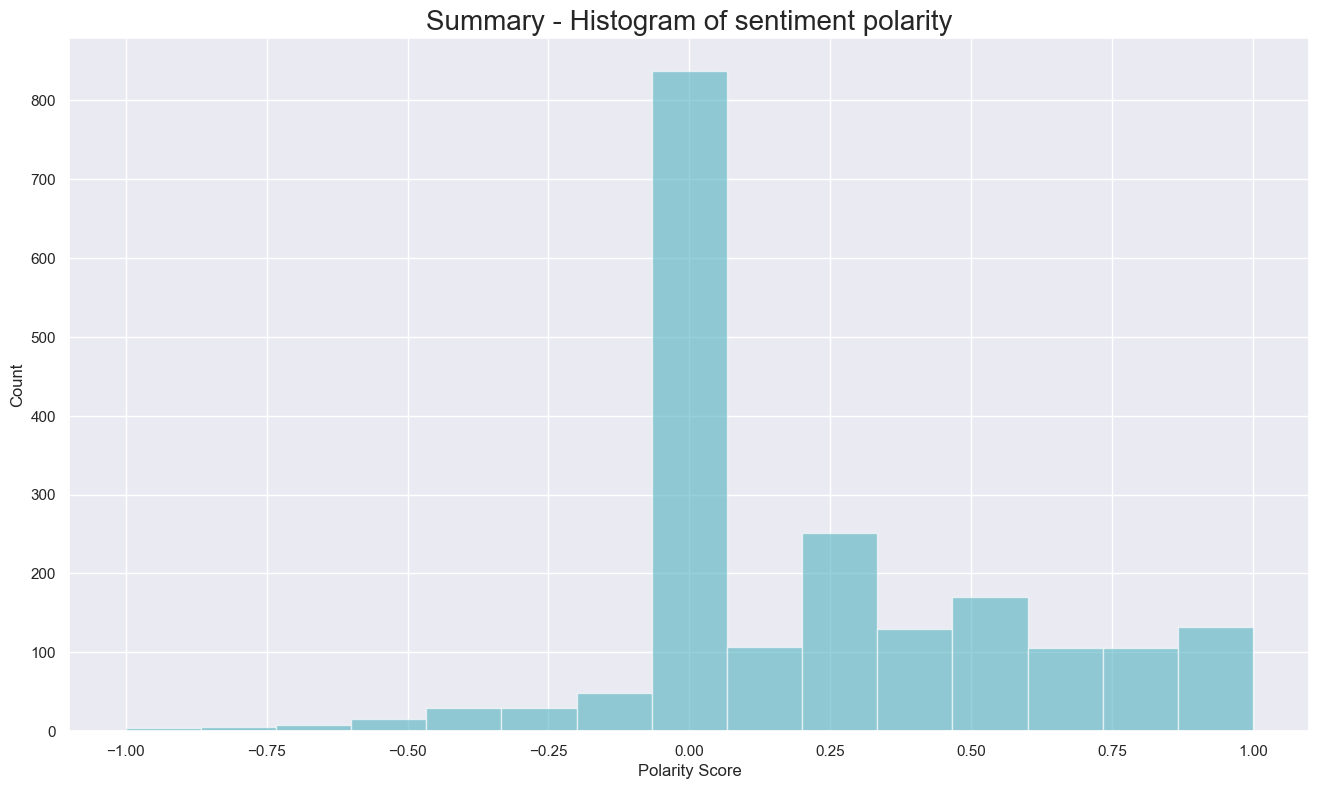

In [407]:
# Summary: Create a histogram plot with bins = 15.
# Histogram of polarity

# Set the number of bins.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(tokenised_df3['summary_polarity'], num_bins, facecolor='#52B2BF', alpha=0.6)

# Set the labels.
plt.xlabel('Polarity Score', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Summary - Histogram of sentiment polarity', fontsize=20)

plt.show()

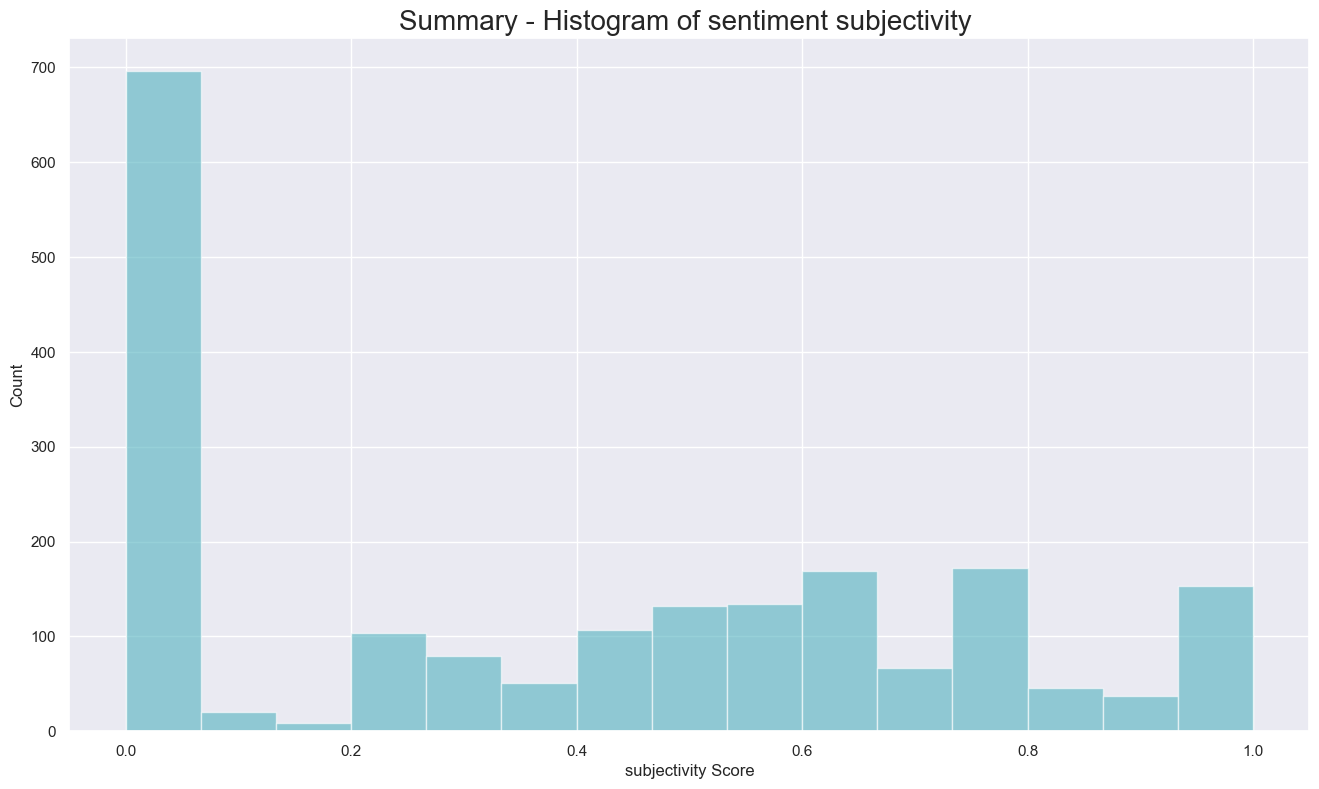

In [406]:
# Set the number of bins.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))
# Define the bars.
n, bins, patches = plt.hist(tokenised_df3['summary_subjectivity'], num_bins, facecolor='#52B2BF', alpha=0.6)

# Set the labels.
plt.xlabel('subjectivity Score', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Summary - Histogram of sentiment subjectivity ', fontsize=20)

plt.show()

## Identify top 20 positive and negative reviews and summaries respectively

In [382]:
# Top 20 negative reviews.
top_20_negative_reviews = tokenised_df3.sort_values('review_polarity', ascending= False).head(20)

# View output.
top_20_negative_reviews

,index,review,summary,review_tokens,summary_tokens,review_polarity,summary_polarity,review_subjectivity,summary_subjectivity
1156,1168,best set. buy 2 if you have the means.,five stars,"[best, set, ., buy, 2, if, you, have, the, mea...","[five, stars]",1.0,0.0,0.300,0.00
586,591,wonderful product,five stars,"[wonderful, product]","[five, stars]",1.0,0.0,1.000,0.00
1584,1602,great doll to go with the book & animals! can'...,great doll to go with the book & animals,"[great, doll, to, go, with, the, book, &, anim...","[great, doll, to, go, with, the, book, &, anim...",1.0,0.8,0.750,0.75
680,685,these are great!,cute letters,"[these, are, great, !]","[cute, letters]",1.0,0.5,0.750,1.00
1576,1594,great product! my students loved it! thank you!,five stars,"[great, product, !, my, students, loved, it, !...","[five, stars]",1.0,0.0,0.775,0.00
1943,1967,perfect for tutoring my grandson in spelling.,tutoring,"[perfect, for, tutoring, my, grandson, in, spe...",[tutoring],1.0,0.0,1.000,0.00
1706,1726,excellent toy to simulate thought!,five stars,"[excellent, toy, to, simulate, thought, !]","[five, stars]",1.0,0.0,1.000,0.00
1170,1182,my grandson loved it!!,five stars,"[my, grandson, loved, it, !, !]","[five, stars]",1.0,0.0,0.800,0.00
1165,1177,awesome addition to my rpg gm system.,five stars,"[awesome, addition, to, my, rpg, gm, system, .]","[five, stars]",1.0,0.0,1.000,0.00
216,216,great product! arrived on time.,five stars,"[great, product, !, arrived, on, time, .]","[five, stars]",1.0,0.0,0.750,0.00


In [383]:
# Top 20 negative summaries.
top_20_negative_summaries = tokenised_df3.sort_values(by='summary_polarity',ascending=True).head(20)

# View output.
top_20_negative_summaries[['index', 'summary', 'summary_polarity']]

,index,summary,summary_polarity
21,21,the worst value i've ever seen,-1.000
823,829,boring,-1.000
208,208,boring unless you are a craft person which i a...,-1.000
1154,1166,before this i hated running any rpg campaign d...,-0.900
1,1,another worthless dungeon master's screen from...,-0.800
144,144,disappointed,-0.750
1602,1620,disappointed,-0.750
626,631,disappointed.,-0.750
788,793,disappointed,-0.750
362,363,promotes anger instead of teaching calming met...,-0.700


In [384]:
# Top 20 positive reviews.
top_20_positive_reviews = tokenised_df3.sort_values(by='review_polarity',ascending=False).head(20)

# View output.
top_20_positive_reviews[['index', 'review', 'review_polarity']]

,index,review,review_polarity
1156,1168,best set. buy 2 if you have the means.,1.0
586,591,wonderful product,1.0
1584,1602,great doll to go with the book & animals! can'...,1.0
680,685,these are great!,1.0
1576,1594,great product! my students loved it! thank you!,1.0
1943,1967,perfect for tutoring my grandson in spelling.,1.0
1706,1726,excellent toy to simulate thought!,1.0
1170,1182,my grandson loved it!!,1.0
1165,1177,awesome addition to my rpg gm system.,1.0
216,216,great product! arrived on time.,1.0


In [385]:
# Top 20 positive summaries.
top_20_positive_summaries = tokenised_df3.sort_values(by='summary_polarity',ascending=False).head(20)

# View output.
top_20_positive_summaries[['index', 'summary', 'summary_polarity']]

,index,summary,summary_polarity
1425,1440,adds a six player option and an excellent expa...,1.0
1232,1245,excellent tile set,1.0
1073,1083,best dungeon crawler,1.0
799,804,great !!,1.0
161,161,awesome book...,1.0
163,163,he was very happy with his gift,1.0
742,747,great!,1.0
601,606,love it!!!!,1.0
1163,1175,another great dungeon command set!,1.0
594,599,best easter teaching tool!,1.0


In [386]:
# Function to calculate percentages
def calculate_percentages(column):
    total_count = len(column)
    positive_count = sum(column > 0)
    negative_count = sum(column < 0)
    neutral_count = sum(column == 0)

    percentage_positive = (positive_count / total_count) * 100
    percentage_negative = (negative_count / total_count) * 100
    percentage_neutral = (neutral_count / total_count) * 100

    return percentage_positive, percentage_negative, percentage_neutral

# Calculate percentages for review_polarity
review_polarity_percentage_positive, review_polarity_percentage_negative, review_polarity_percentage_neutral = calculate_percentages(tokenised_df3['review_polarity'])

# Calculate percentages for summary_polarity
summary_polarity_percentage_positive, summary_polarity_percentage_negative, summary_polarity_percentage_neutral = calculate_percentages(tokenised_df3['summary_polarity'])

# Display the results
print("Review Polarity Percentages:")
print(f"Positive: {review_polarity_percentage_positive}%")
print(f"Negative: {review_polarity_percentage_negative}%")
print(f"Neutral: {review_polarity_percentage_neutral}%\n")

print("Summary Polarity Percentages:")
print(f"Positive: {summary_polarity_percentage_positive}%")
print(f"Negative: {summary_polarity_percentage_negative}%")
print(f"Neutral: {summary_polarity_percentage_neutral}%\n")

Review Polarity Percentages:
Positive: 80.45569620253164%
Negative: 15.443037974683543%
Neutral: 4.10126582278481%

Summary Polarity Percentages:
Positive: 53.11392405063291%
Negative: 9.873417721518987%
Neutral: 37.0126582278481%



In [389]:
# Function to calculate percentages for subjectivity
def calculate_subjectivity_percentages(column):
    total_count = len(column)
    objective_count = sum(column <= 0.5)
    subjective_count = sum((column > 0.5) | (column == 1.0))

    percentage_objective = (objective_count / total_count) * 100
    percentage_subjective = (subjective_count / total_count) * 100

    return percentage_objective, percentage_subjective

# Calculate percentages for review_sentiment
review_sentiment_percentage_objective, review_sentiment_percentage_subjective = calculate_subjectivity_percentages(tokenised_df3['review_subjectivity'])

# Calculate percentages for summary_sentiment
summary_sentiment_percentage_objective, summary_sentiment_percentage_subjective = calculate_subjectivity_percentages(tokenised_df3['summary_subjectivity'])

# Display the results for subjectivity
print("Review Sentiment Subjectivity Percentages:")
print(f"Objective: {review_sentiment_percentage_objective}%")
print(f"Subjective: {review_sentiment_percentage_subjective}%\n")

print("Summary Sentiment Subjectivity Percentages:")
print(f"Objective: {summary_sentiment_percentage_objective}%")
print(f"Subjective: {summary_sentiment_percentage_subjective}%")

Review Sentiment Subjectivity Percentages:
Objective: 47.949367088607595%
Subjective: 52.050632911392405%

Summary Sentiment Subjectivity Percentages:
Objective: 59.44303797468354%
Subjective: 40.55696202531646%


## Insights and observations

> Demographic Information:
The average age of the reviewers is around 39.5 years, indicating a diverse age range 
among the customers providing reviews.

> Education Distribution:
A majority of the reviewers are classified as graduates, suggesting that educated individuals 
are more likely to leave reviews on the website.

> Top Words in Reviews and Summaries:
The top words extracted from both the review comments and summaries provide insight into the most 
frequently mentioned aspects.
Common words in reviews include 'game,' 'great,' 'fun,' 'play,' and 'love,' indicating positive sentiments.
In summaries, terms like 'stars,' 'five,' 'game,' and 'great' are prevalent, 
suggesting a focus on rating, enjoyment, and positive aspects.

> Polarity Scores:
Review and summary polarity scores show the sentiment orientation of the comments.
Positive review sentiment dominates, with approximately 80.46%, while negative sentiments account for 15.44%, 
and neutral for 4.10%.
Summary sentiment percentages are different, with positive at 53.11%, negative at 9.87%, and neutral at 37.01%.
Notably, there are reviews with both positive and negative sentiments, as indicated by non-zero percentages 
in both categories.

> Subjectivity Scores:
The subjectivity scores reveal the degree of objectivity or subjectivity in both reviews and summaries.
Reviews show a relatively balanced subjectivity distribution, with 47.95% objective and 52.05% subjective.
Summaries, however, lean more towards objectivity, with 59.44% being objective and 40.56% subjective.

> Polarity and Subjectivity Correlation:
The correlation between polarity and subjectivity scores suggests that reviewers express a mix of sentiments
even within objective statements.
For example, some reviews with a high positive polarity may also exhibit high subjectivity, 
indicating emotional expressions.

> Customer Engagement:
The presence of both positive and negative sentiments suggests active customer engagement, as customers are 
expressing diverse opinions and experiences.

> Potential Areas for Improvement:
Negative sentiments in reviews might highlight areas that need attention or improvement in products or services.
Analyzing specific terms in negative reviews can provide insights into customer pain points.

### Insights & Recommendation
> Positive Sentiments for Marketing:
Highlight positive sentiments and frequently mentioned positive words ('game,' 'great,' 'fun,' 'love') in marketing materials.
Incorporate positive customer testimonials or quotes in advertising to build trust and credibility.

> Targeting Graduates in Campaigns:
Given that a significant number of reviewers are graduates, tailor marketing campaigns to resonate with this educated 
demographic. Craft content that appeals to the preferences and interests of individuals with 
higher educational qualifications.

> Addressing Negative Feedback:
Use insights from negative sentiments in reviews to identify specific areas for improvement.
Develop marketing campaigns addressing and showcasing improvements made in response to customer feedback, 
demonstrating a commitment to customer satisfaction.

> Utilizing Specific Terms:
Incorporate specific terms mentioned frequently in reviews ('stars,' 'five,' 'game,' 'great') into marketing 
messages to align with customer preferences.Emphasize positive aspects highlighted in reviews to reinforce positive perceptions.

> Showcasing Objectivity in Campaigns:
Acknowledge the balanced subjectivity in reviews and use this to highlight objective aspects of products or 
services. Emphasize features or benefits that appeal to a wide audience, considering both subjective and 
objective perspectives.

> Engagement and Interaction:
Encourage customers to share their experiences on social media or review platforms.
Run campaigns that prompt customers to provide feedback, testimonials, or participate in user-generated content, 
fostering a sense of community.

> Diversity of Opinions:
Embrace the diversity of opinions expressed in reviews to showcase a comprehensive and authentic customer 
experience. Create marketing messages that celebrate the varied perspectives of customers, highlighting a 
broad appeal.

> Incorporating Customer Quotes:
Use positive quotes from customer reviews in marketing collateral, such as advertisements, product packaging, 
or on the company website. Authentic customer testimonials can be powerful in influencing potential customers.

> Targeted Messaging:
Tailor marketing messages to address the identified demographic characteristics, ensuring that the content 
resonates with the age range and educational background of the audience.

> Monitoring and Iterating:
Continuously monitor new customer reviews and feedback for evolving trends and sentiments.
Iterate marketing campaigns based on ongoing customer input to stay responsive to changing preferences.


# 